# Disclaimer

**Esse .ipynb foi feito sob demanda para o meu artigo de TCC.** Ou seja, há coisas que inicialmente achei que iriam ser utilizadas e que não foram (irei remover). Além disso, há muito código para ser refatorado, visto que fui fazendo by example e não dei importância para esse colab em si.

Gráficos com muito zoom e algo do gênero foi pelo fato de tentar a aumentar a fonte mas no modelo IEE acaba ficando pequeno de toda forma. Possivelmente irei ajustar tais gráficos.

# Carregando dataset

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import numpy as np
import plotly.graph_objects as go
from scipy.stats import spearmanr

import warnings
warnings.filterwarnings('ignore')

In [68]:
urls = [
    "https://docs.google.com/spreadsheets/d/13EpnrAdjeDm1ew9aR-PoE4PvkFvOBVcX9CR-rSHm0LQ/edit#gid=484219115",
    "https://docs.google.com/spreadsheets/d/18h4KV3uwBlTKmdsx9tBBq04OIYjgGJw2YpojRh3-PKc/edit#gid=2075756110",
    "https://docs.google.com/spreadsheets/d/1HPTgHb0C92wTcPlXPp2Uh6z-QfvN8iHNdDBSUOSfeb8/edit#gid=1250197154"
]

def create_dataframes(urls):
    dataframes = []
    for url in urls:
        url_csv = url.replace("/edit#gid=", "/export?format=csv&gid=")
        dataframes.append(pd.read_csv(url_csv))
    return dataframes

dataframes = create_dataframes(urls)

# Normalizando o dataset

In [69]:
def normalize_dataframe(df):
    df = df.drop(df.columns[[0, 1]], axis=1)
    new_column_names = [
        "nutricao", "dormir_demais", "dormir_insuficiente", "problemas_relacionamento", "falta_aulas",
        "problemas_colega_quarto", "excesso_exercicio", "falta_exercicio", "atividades_sociais", "financas",
        "carga_horaria_curso", "pressao_familia_emprego", "incerteza_futuro_profissional", "elaboracao_tcc",
        "pss_chateado_inesperado", "pss_controle_coisas", "pss_nervoso_estressado", "pss_confiante_problemas",
        "pss_coisas_jeito", "pss_nao_lidar_coisas", "pss_controle_irritacoes", "pss_controle_geral",
        "pss_irritado_fora_controle", "pss_dificuldades_acumuladas", "genero", "auto_declaracao",
        "ensino_medio", "deficiencia_condicao_medica", "filhos", "auxilio_prac", "cra"
    ]
    new_columns = dict(zip(df.columns, new_column_names))
    df.rename(columns=new_columns, inplace=True)
    return df

df_start, df_middle, df_end = [normalize_dataframe(df) for df in dataframes]

# df = pd.concat([df_start, df_middle, df_end], ignore_index=True)

# df

df_start

,nutricao,dormir_demais,dormir_insuficiente,problemas_relacionamento,falta_aulas,problemas_colega_quarto,excesso_exercicio,falta_exercicio,atividades_sociais,financas,...,pss_controle_geral,pss_irritado_fora_controle,pss_dificuldades_acumuladas,genero,auto_declaracao,ensino_medio,deficiencia_condicao_medica,filhos,auxilio_prac,cra
0,4,3,3,3,5,2,1,5,5,4,...,1,5,4,Feminino,Branco,Escola pública (governo federal),Não,Não,Não,7.20
1,2,2,4,4,3,3,4,2,2,3,...,3,3,3,Masculino,Pardo,Escola particular,Não,Não,Não,6.08
2,3,1,4,1,4,1,3,1,2,3,...,3,4,3,Masculino,Branco,Escola particular,Não,Não,Não,6.50
3,5,1,5,5,3,5,1,5,5,5,...,1,5,5,Masculino,Pardo,Escola particular,Sim,Não,Não,6.40
4,5,4,3,3,5,1,1,4,2,5,...,2,4,5,Feminino,Branco,Escola particular,Não,Não,Não,7.60
5,1,2,4,2,2,1,2,3,3,3,...,4,3,2,Masculino,Branco,Escola particular,Não,Não,Não,9.26
6,1,3,2,1,1,1,2,4,3,2,...,4,2,2,Masculino,Branco,Escola particular,Sim,Não,Não,7.30
7,5,1,5,2,4,1,1,5,3,4,...,2,5,4,Masculino,Branco,Escola pública (governo estadual),Não,Não,Não,7.40
8,2,2,4,3,1,2,1,4,4,2,...,3,5,5,Feminino,Pardo,Escola particular,Não,Não,Não,9.10
9,2,1,4,3,2,3,1,4,3,3,...,3,4,4,Masculino,Pardo,Escola pública (governo estadual),Não,Não,Sim,8.90


# Códigos para geração de informação para o TCC

**TODO:** refatorar

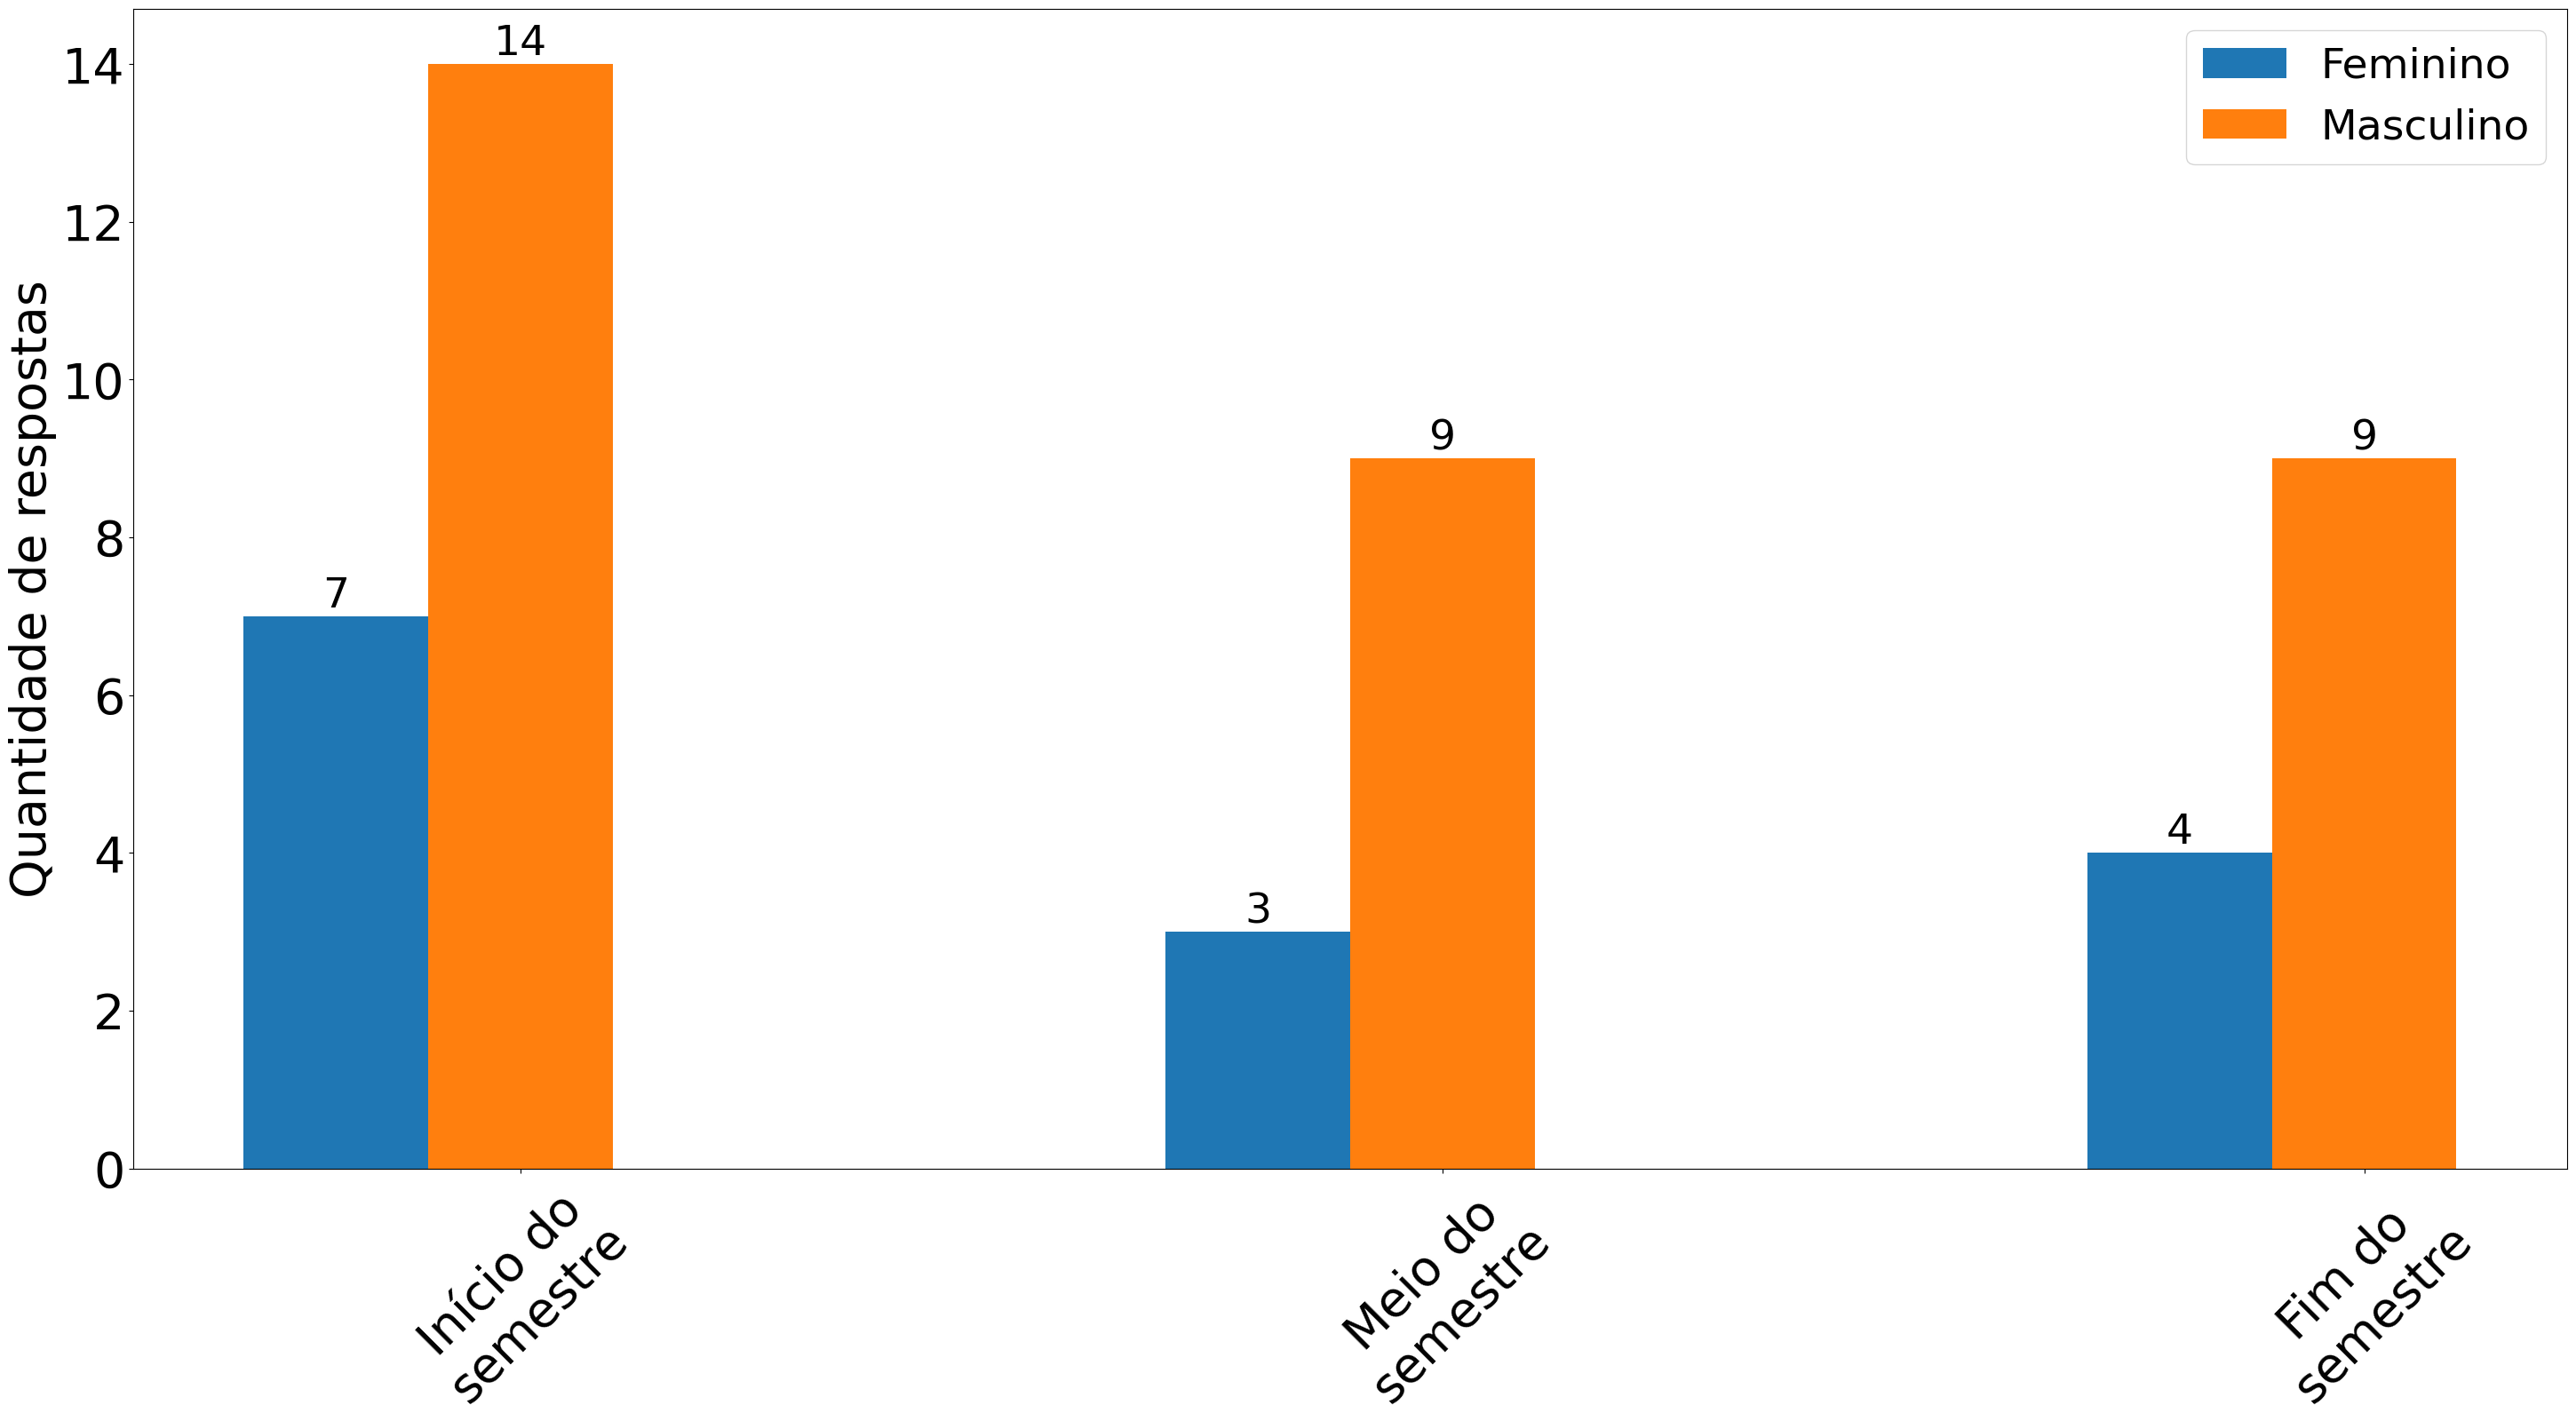

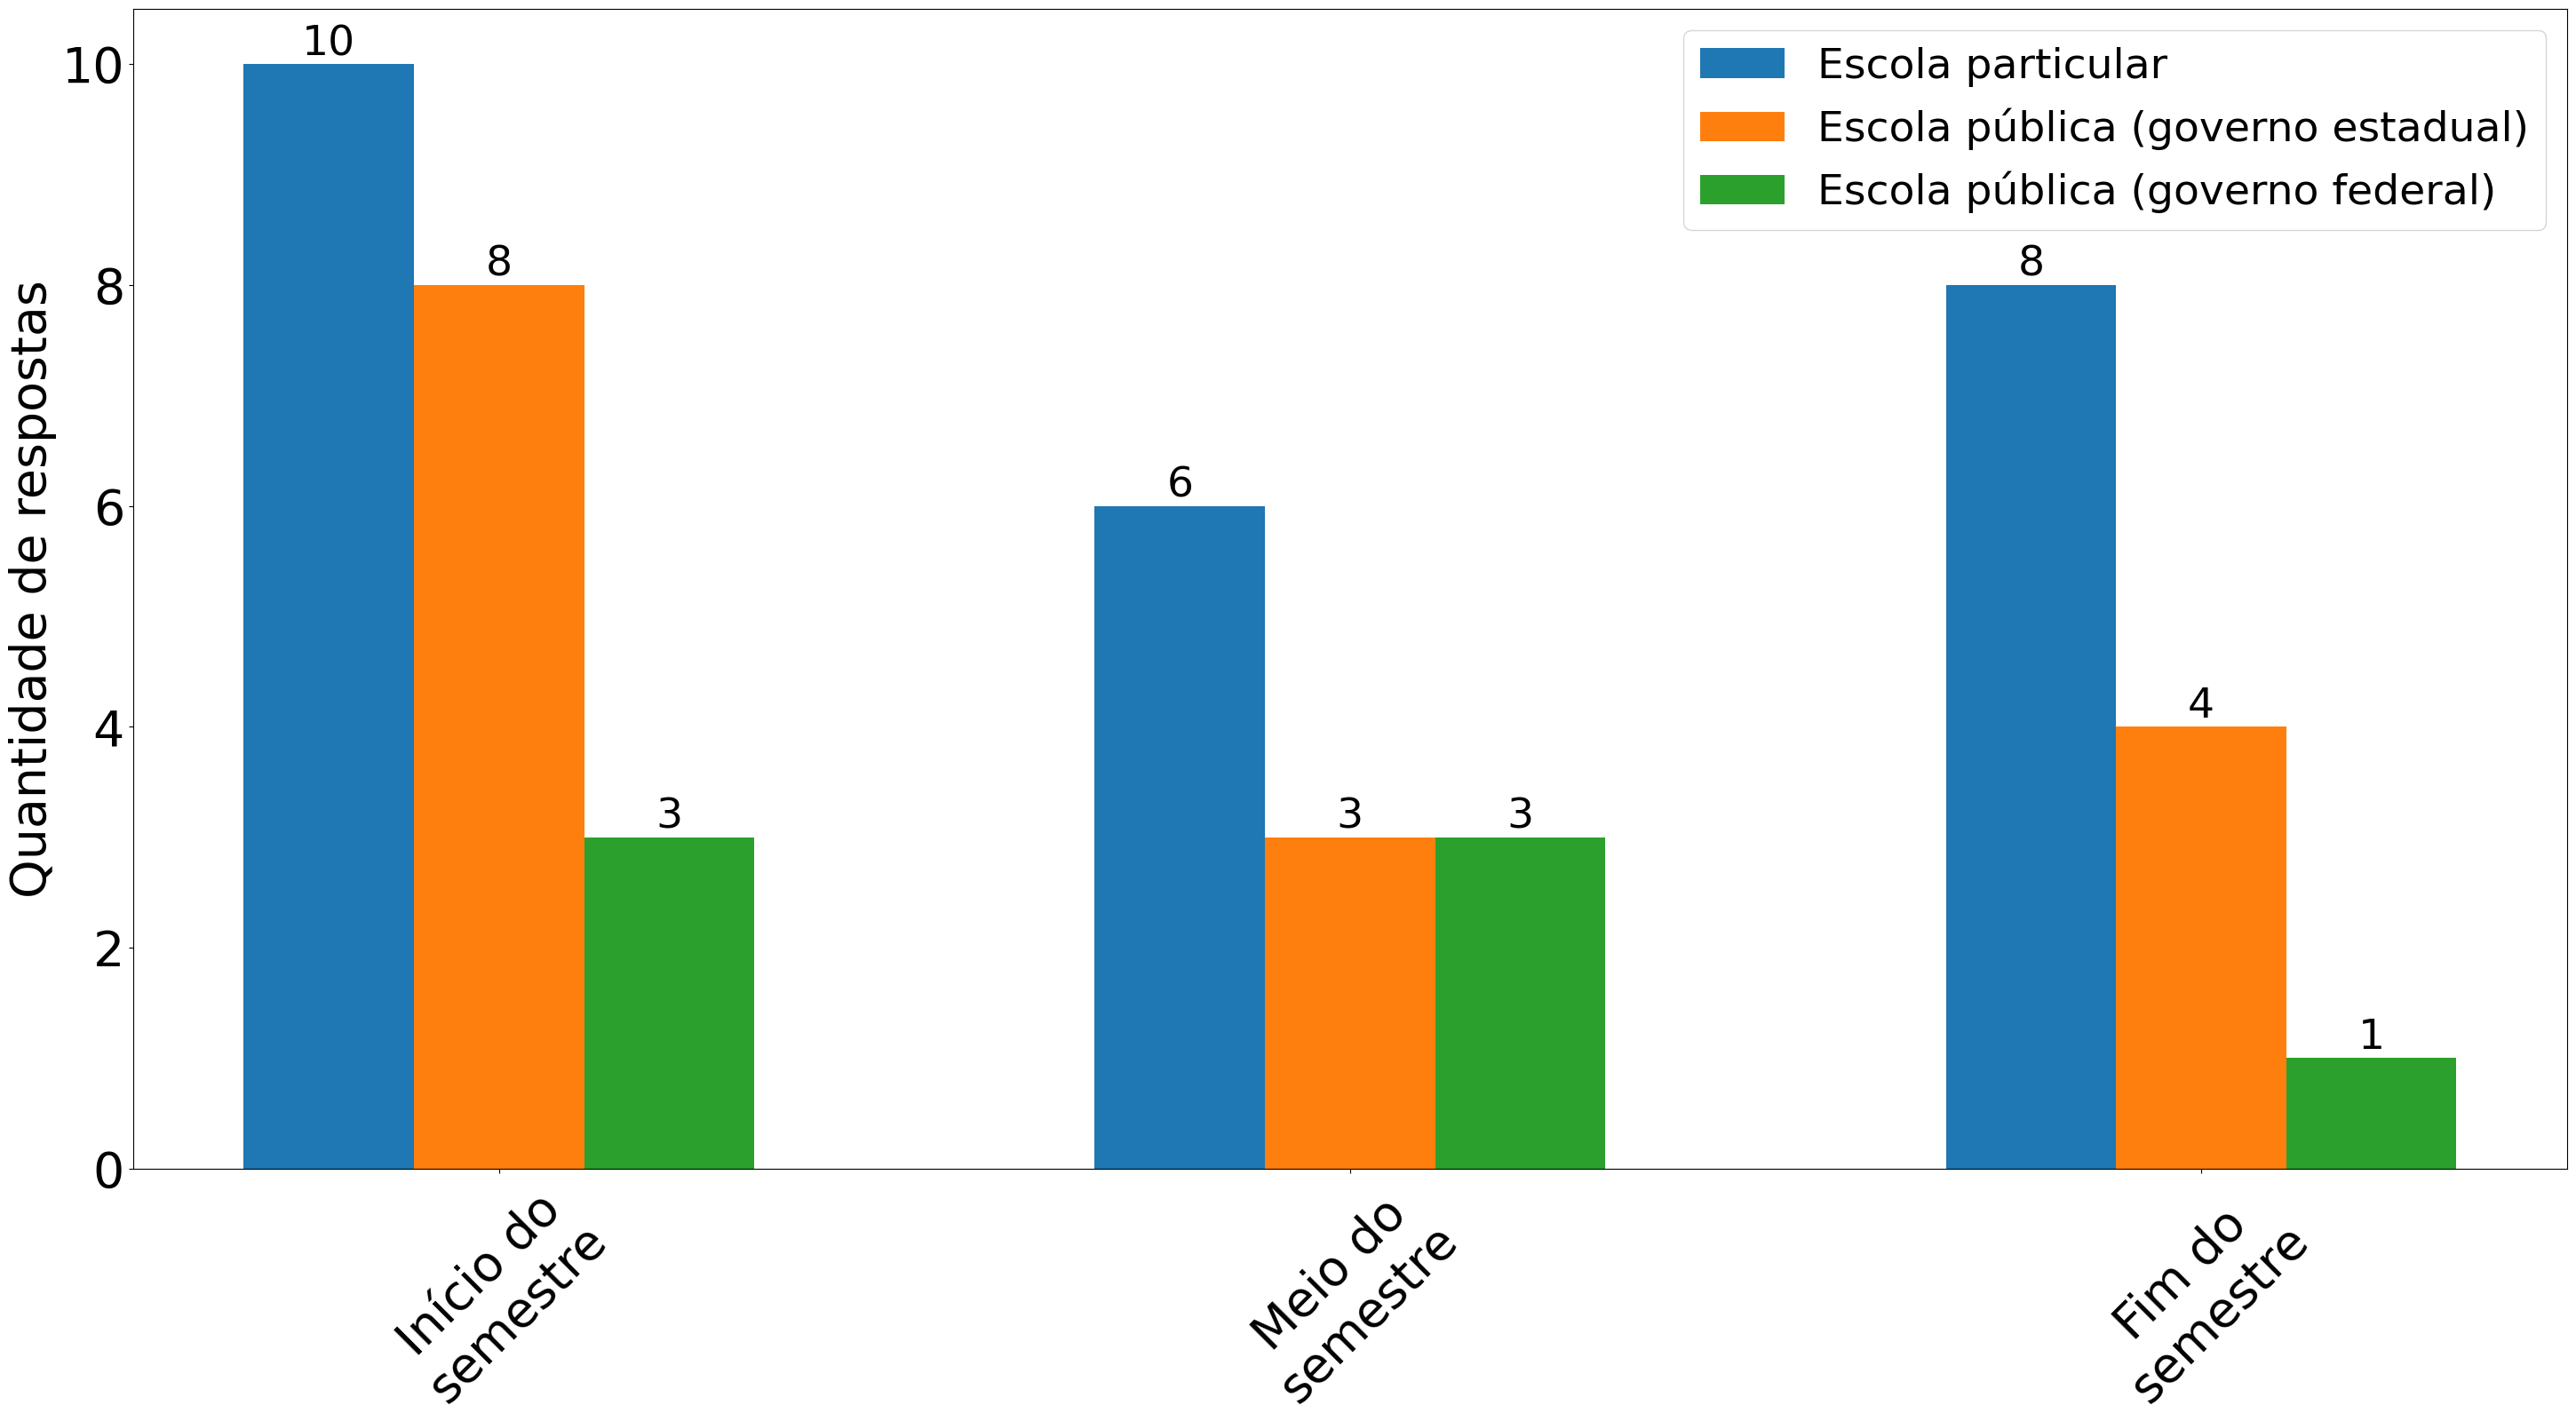

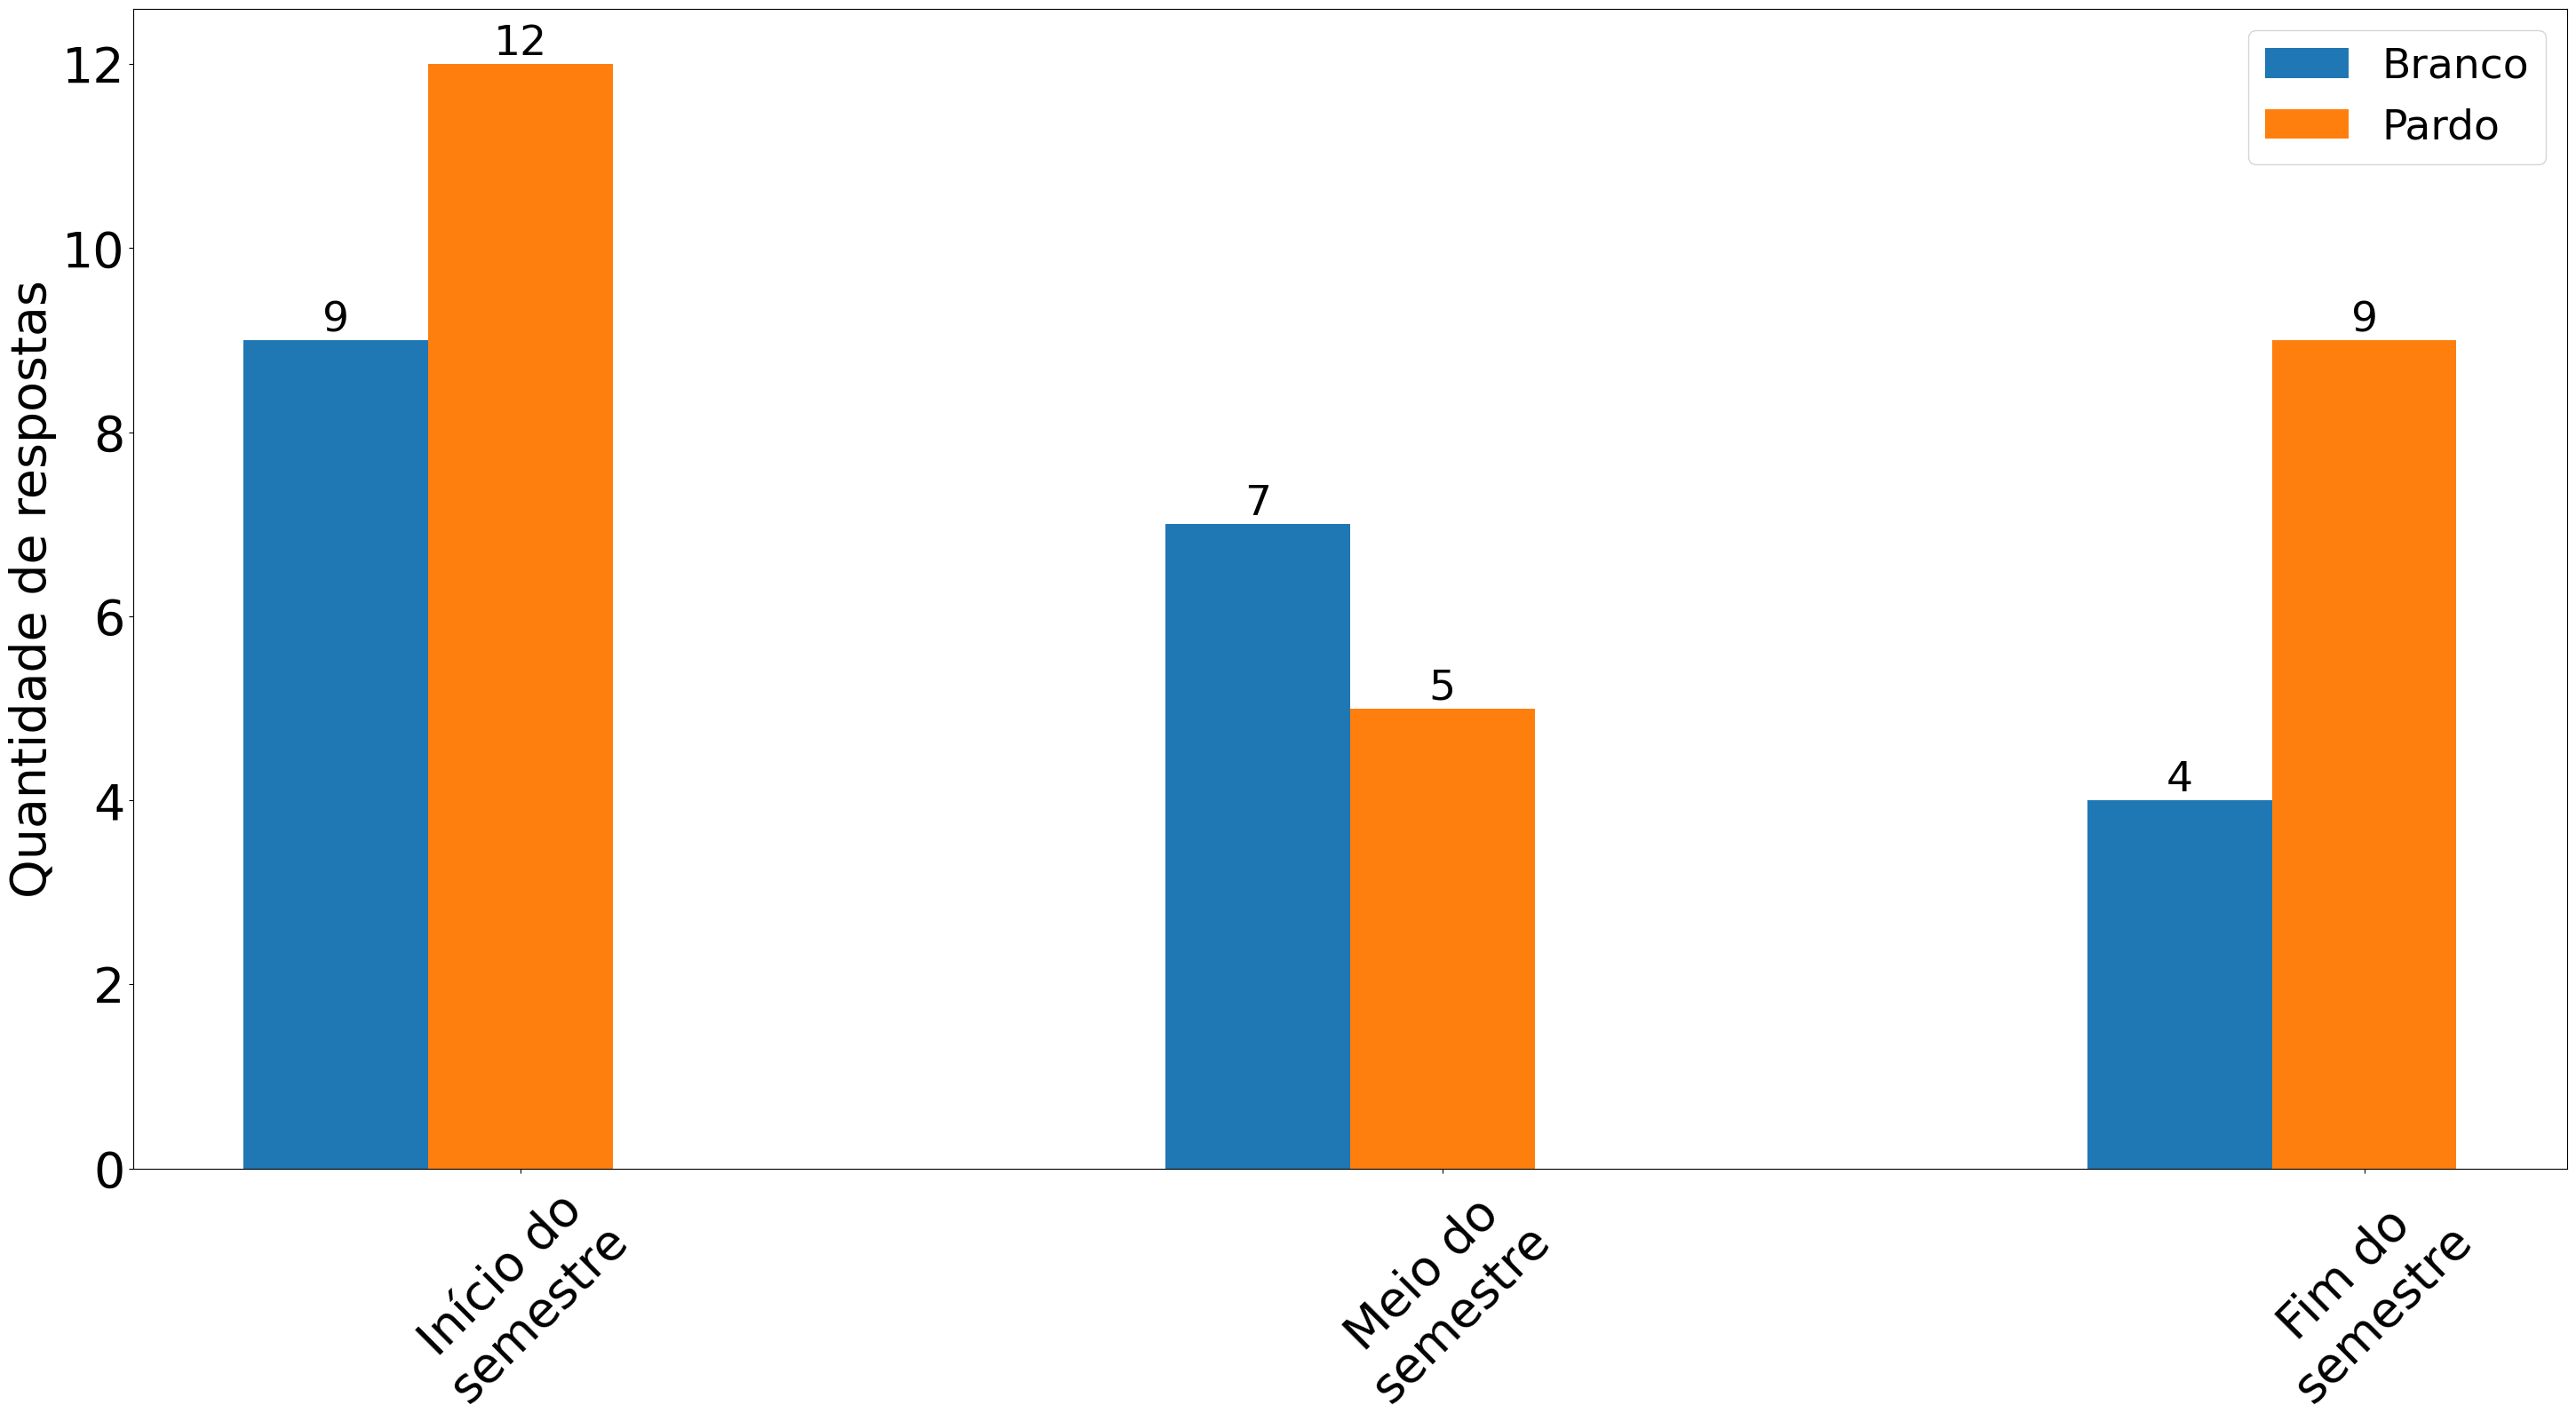

In [70]:
import matplotlib.pyplot as plt

def plot_demographics(df_list, column):
    labels = ['Início do\nsemestre', 'Meio do\nsemestre', 'Fim do\nsemestre']
    plt.figure(figsize=(30,17))

    fontsize = 40
    plt.rc('font', size=fontsize)          # controls default text sizes
    plt.rc('axes', titlesize=fontsize)     # fontsize of the axes title
    plt.rc('axes', labelsize=fontsize)     # fontsize of the x and y labels
    plt.rc('xtick', labelsize=fontsize)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=fontsize)    # fontsize of the tick labels
    plt.rc('legend', fontsize=fontsize)    # legend fontsize
    plt.rc('figure', titlesize=fontsize)   # fontsize of the figure title

    all_categories = set()
    for df in df_list:
        all_categories.update(df[column].unique())
    all_categories = sorted(list(all_categories))

    width = 0.2

    for i, category in enumerate(all_categories):
        counts = [df[df[column] == category].shape[0] for df in df_list]
        bars = plt.bar([pos + width*i for pos in range(len(labels))], counts, width=width, label=category)

        for bar in bars:
            yval = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2.0, yval, int(yval), va='bottom', ha='center', fontsize=fontsize-6)

    plt.xticks([pos + width for pos in range(len(labels))], labels, rotation=45)
    plt.ylabel('Quantidade de respostas')
    plt.legend(loc='upper right', prop={'size': fontsize-6})  # Ajuste o tamanho da fonte da legenda

    plt.tight_layout()
    plt.show()

plot_demographics([df_start, df_middle, df_end], 'genero')
plot_demographics([df_start, df_middle, df_end], 'ensino_medio')
plot_demographics([df_start, df_middle, df_end], 'auto_declaracao')


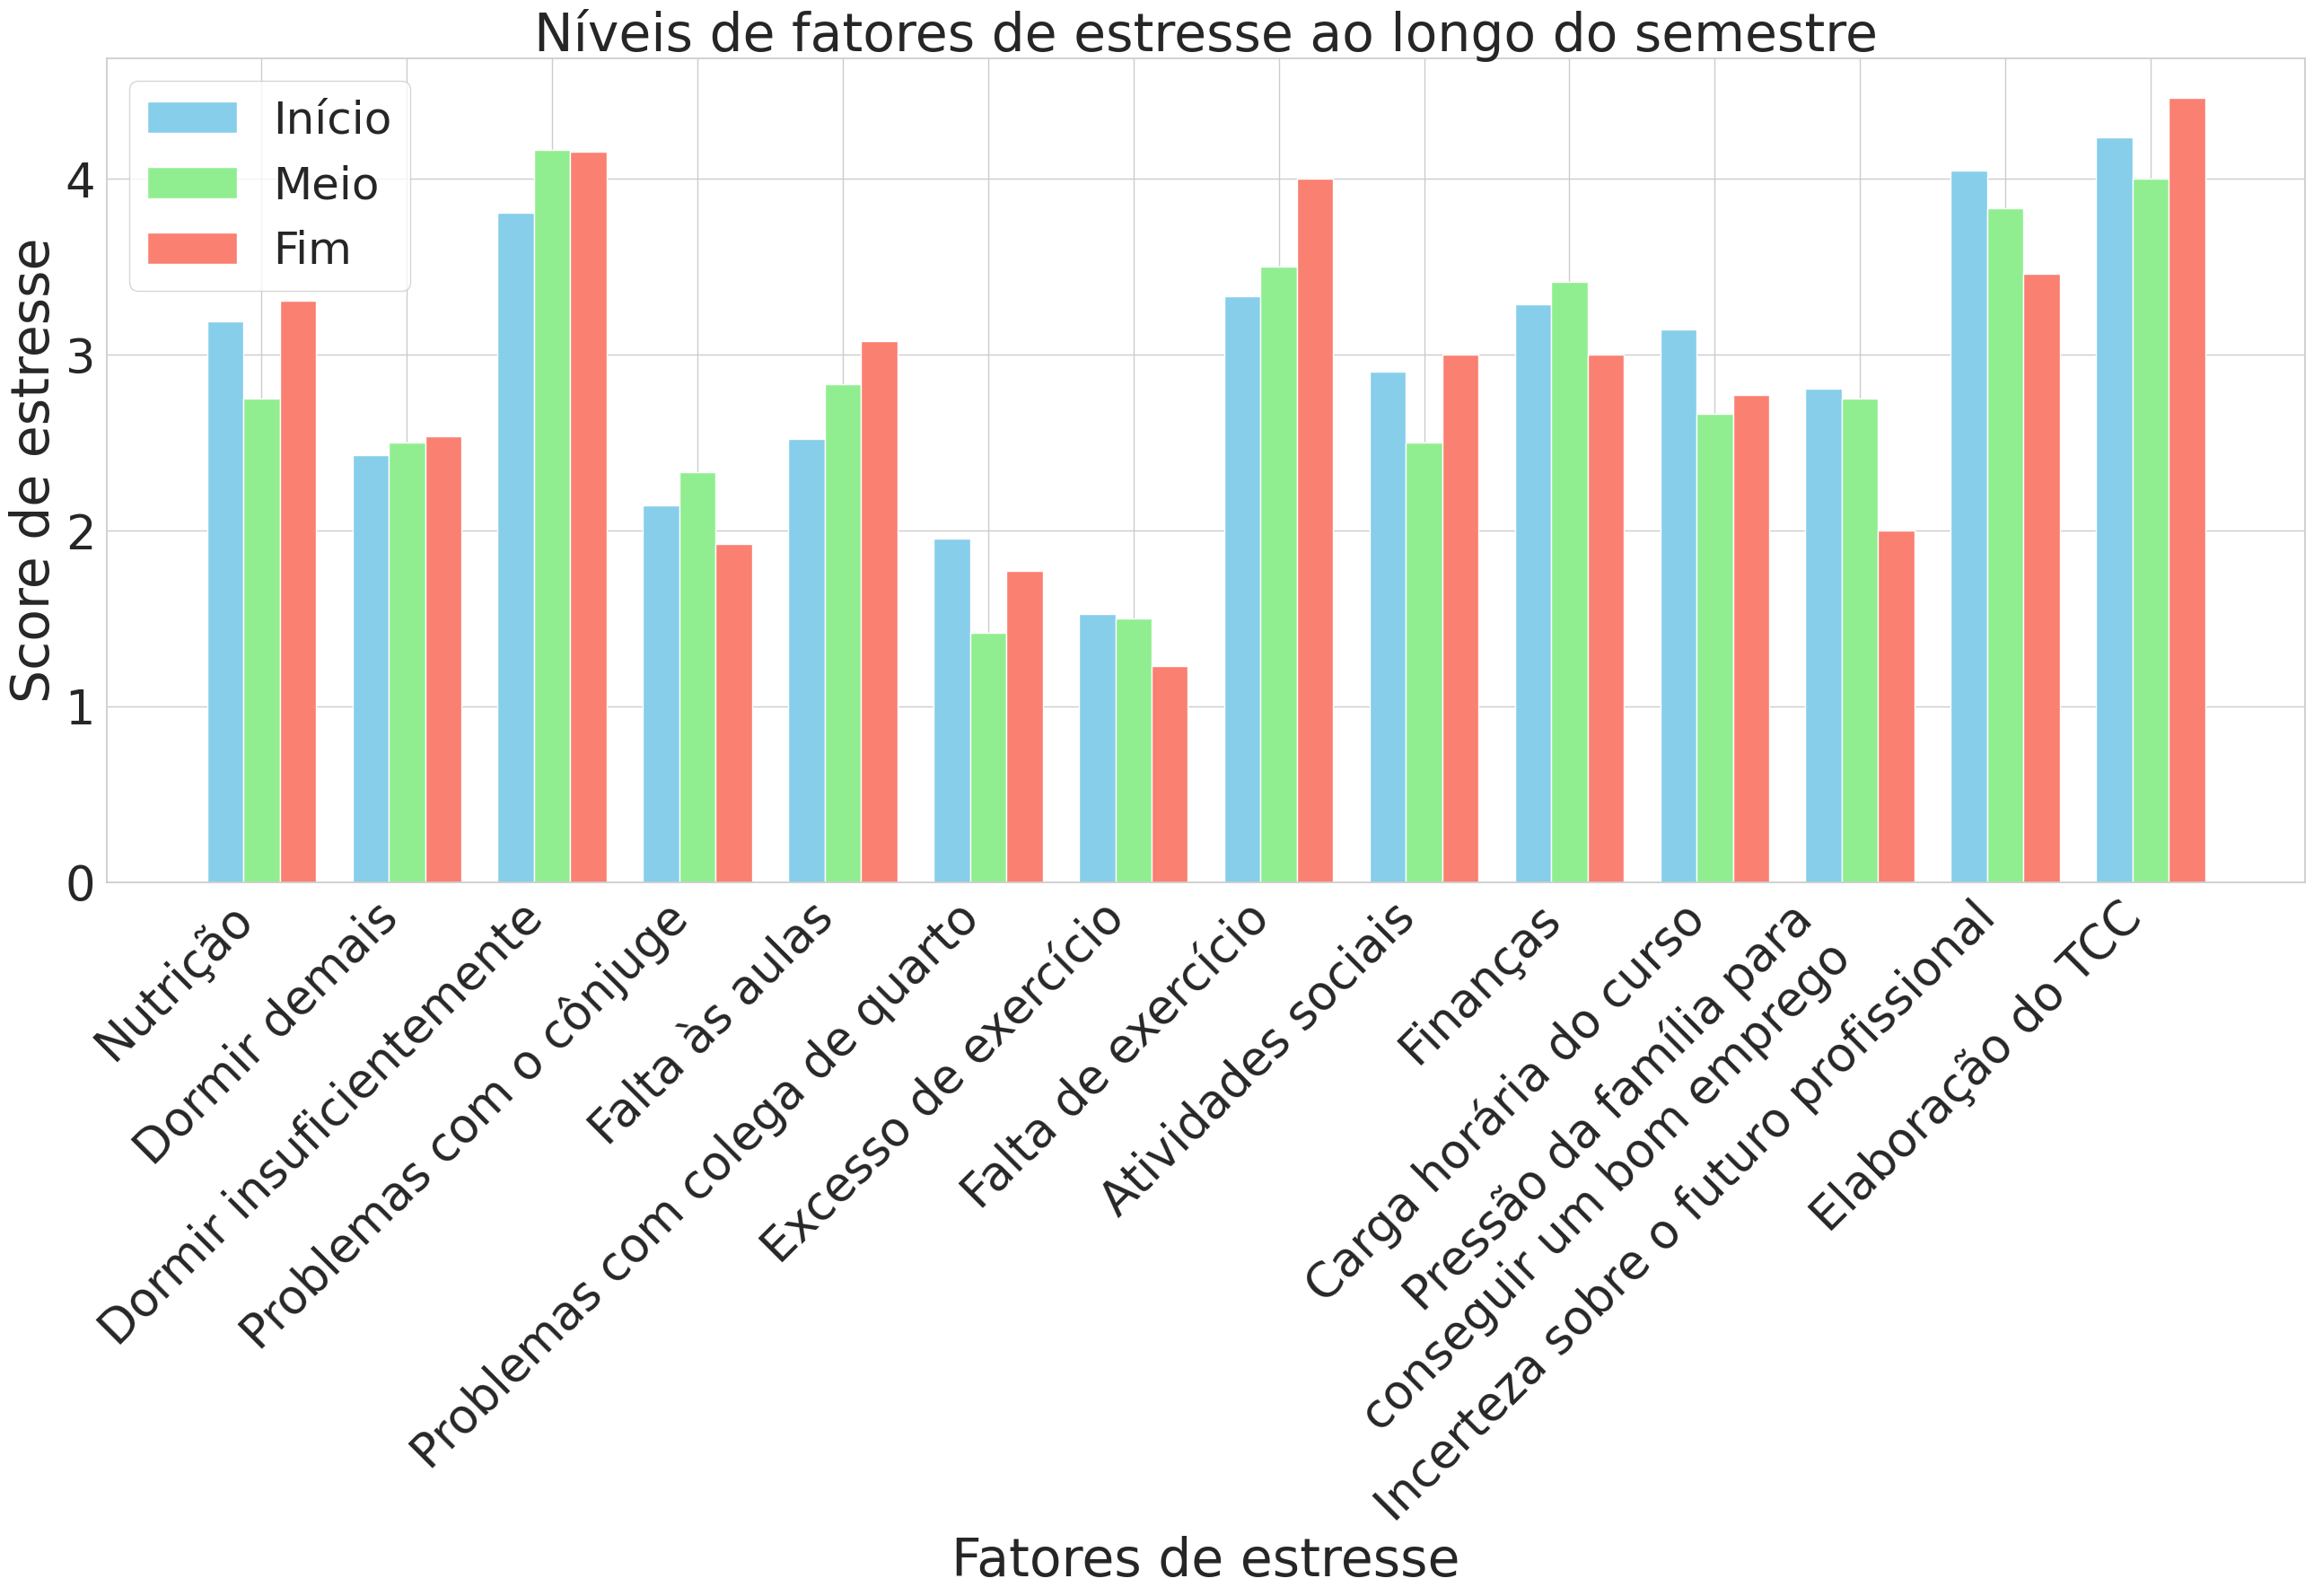

In [135]:
STRESS_FACTORS = [
    "nutricao", "dormir_demais", "dormir_insuficiente", "problemas_relacionamento", "falta_aulas",
    "problemas_colega_quarto", "excesso_exercicio", "falta_exercicio", "atividades_sociais", "financas",
    "carga_horaria_curso", "pressao_familia_emprego", "incerteza_futuro_profissional", "elaboracao_tcc"
]

STRESS_LABELS = {
    "nutricao": "Nutrição",
    "dormir_demais": "Dormir demais",
    "dormir_insuficiente": "Dormir insuficientemente",
    "problemas_relacionamento": "Problemas com o cônjuge",
    "falta_aulas": "Falta às aulas",
    "problemas_colega_quarto": "Problemas com colega de quarto",
    "excesso_exercicio": "Excesso de exercício",
    "falta_exercicio": "Falta de exercício",
    "atividades_sociais": "Atividades sociais",
    "financas": "Finanças",
    "carga_horaria_curso": "Carga horária do curso",
    "pressao_familia_emprego": "Pressão da família para\n conseguir um bom emprego",
    "incerteza_futuro_profissional": "Incerteza sobre o futuro profissional",
    "elaboracao_tcc": "Elaboração do TCC"
}

COLORS = ['skyblue', 'lightgreen', 'salmon']

def compute_means(df_start, df_middle, df_end):
    means_inicio = df_start[STRESS_FACTORS].mean()
    means_meio = df_middle[STRESS_FACTORS].mean()
    means_fim = df_end[STRESS_FACTORS].mean()

    return pd.DataFrame({
        'Fatores de estresse': STRESS_FACTORS,
        'Início do semestre': means_inicio.values,
        'Meio do semestre': means_meio.values,
        'Fim do semestre': means_fim.values
    })

def plot_bar_chart(df_means):
    fig, ax = plt.subplots(figsize=(26, 18))

    bar_width = 0.25
    r1 = range(len(df_means['Fatores de estresse']))
    r2 = [x + bar_width for x in r1]
    r3 = [x + bar_width for x in r2]

    ax.bar(r1, df_means['Início do semestre'], width=bar_width, color=COLORS[0], label='Início')
    ax.bar(r2, df_means['Meio do semestre'], width=bar_width, color=COLORS[1], label='Meio')
    ax.bar(r3, df_means['Fim do semestre'], width=bar_width, color=COLORS[2], label='Fim')

    ax.set_title('Níveis de fatores de estresse ao longo do semestre', fontsize=42)
    ax.set_xticks([r + bar_width for r in range(len(df_means['Fatores de estresse']))])
    ax.set_xticklabels([STRESS_LABELS[factor] for factor in df_means['Fatores de estresse']], rotation=45, ha='right', fontsize=38)
    ax.set_ylabel('Score de estresse', fontsize=42)
    ax.set_xlabel('Fatores de estresse', fontsize=42)

    ax.tick_params(axis='y', labelsize=38)
    ax.legend(fontsize=36)
    plt.tight_layout()
    plt.show()

df_means = compute_means(df_start, df_middle, df_end)
plot_bar_chart(df_means)

In [72]:
mean_scores = {
    "Início do semestre": df_start[STRESS_FACTORS].mean(),
    "Meio do semestre": df_middle[STRESS_FACTORS].mean(),
    "Fim do semestre": df_end[STRESS_FACTORS].mean()
}

overall_mean = pd.DataFrame(mean_scores).mean(axis=1)

top_factors = overall_mean.nlargest(5).index.tolist()

print("Top 5 fatores de estresse:", top_factors)


Top 5 fatores de estresse: ['elaboracao_tcc', 'dormir_insuficiente', 'incerteza_futuro_profissional', 'falta_exercicio', 'financas']


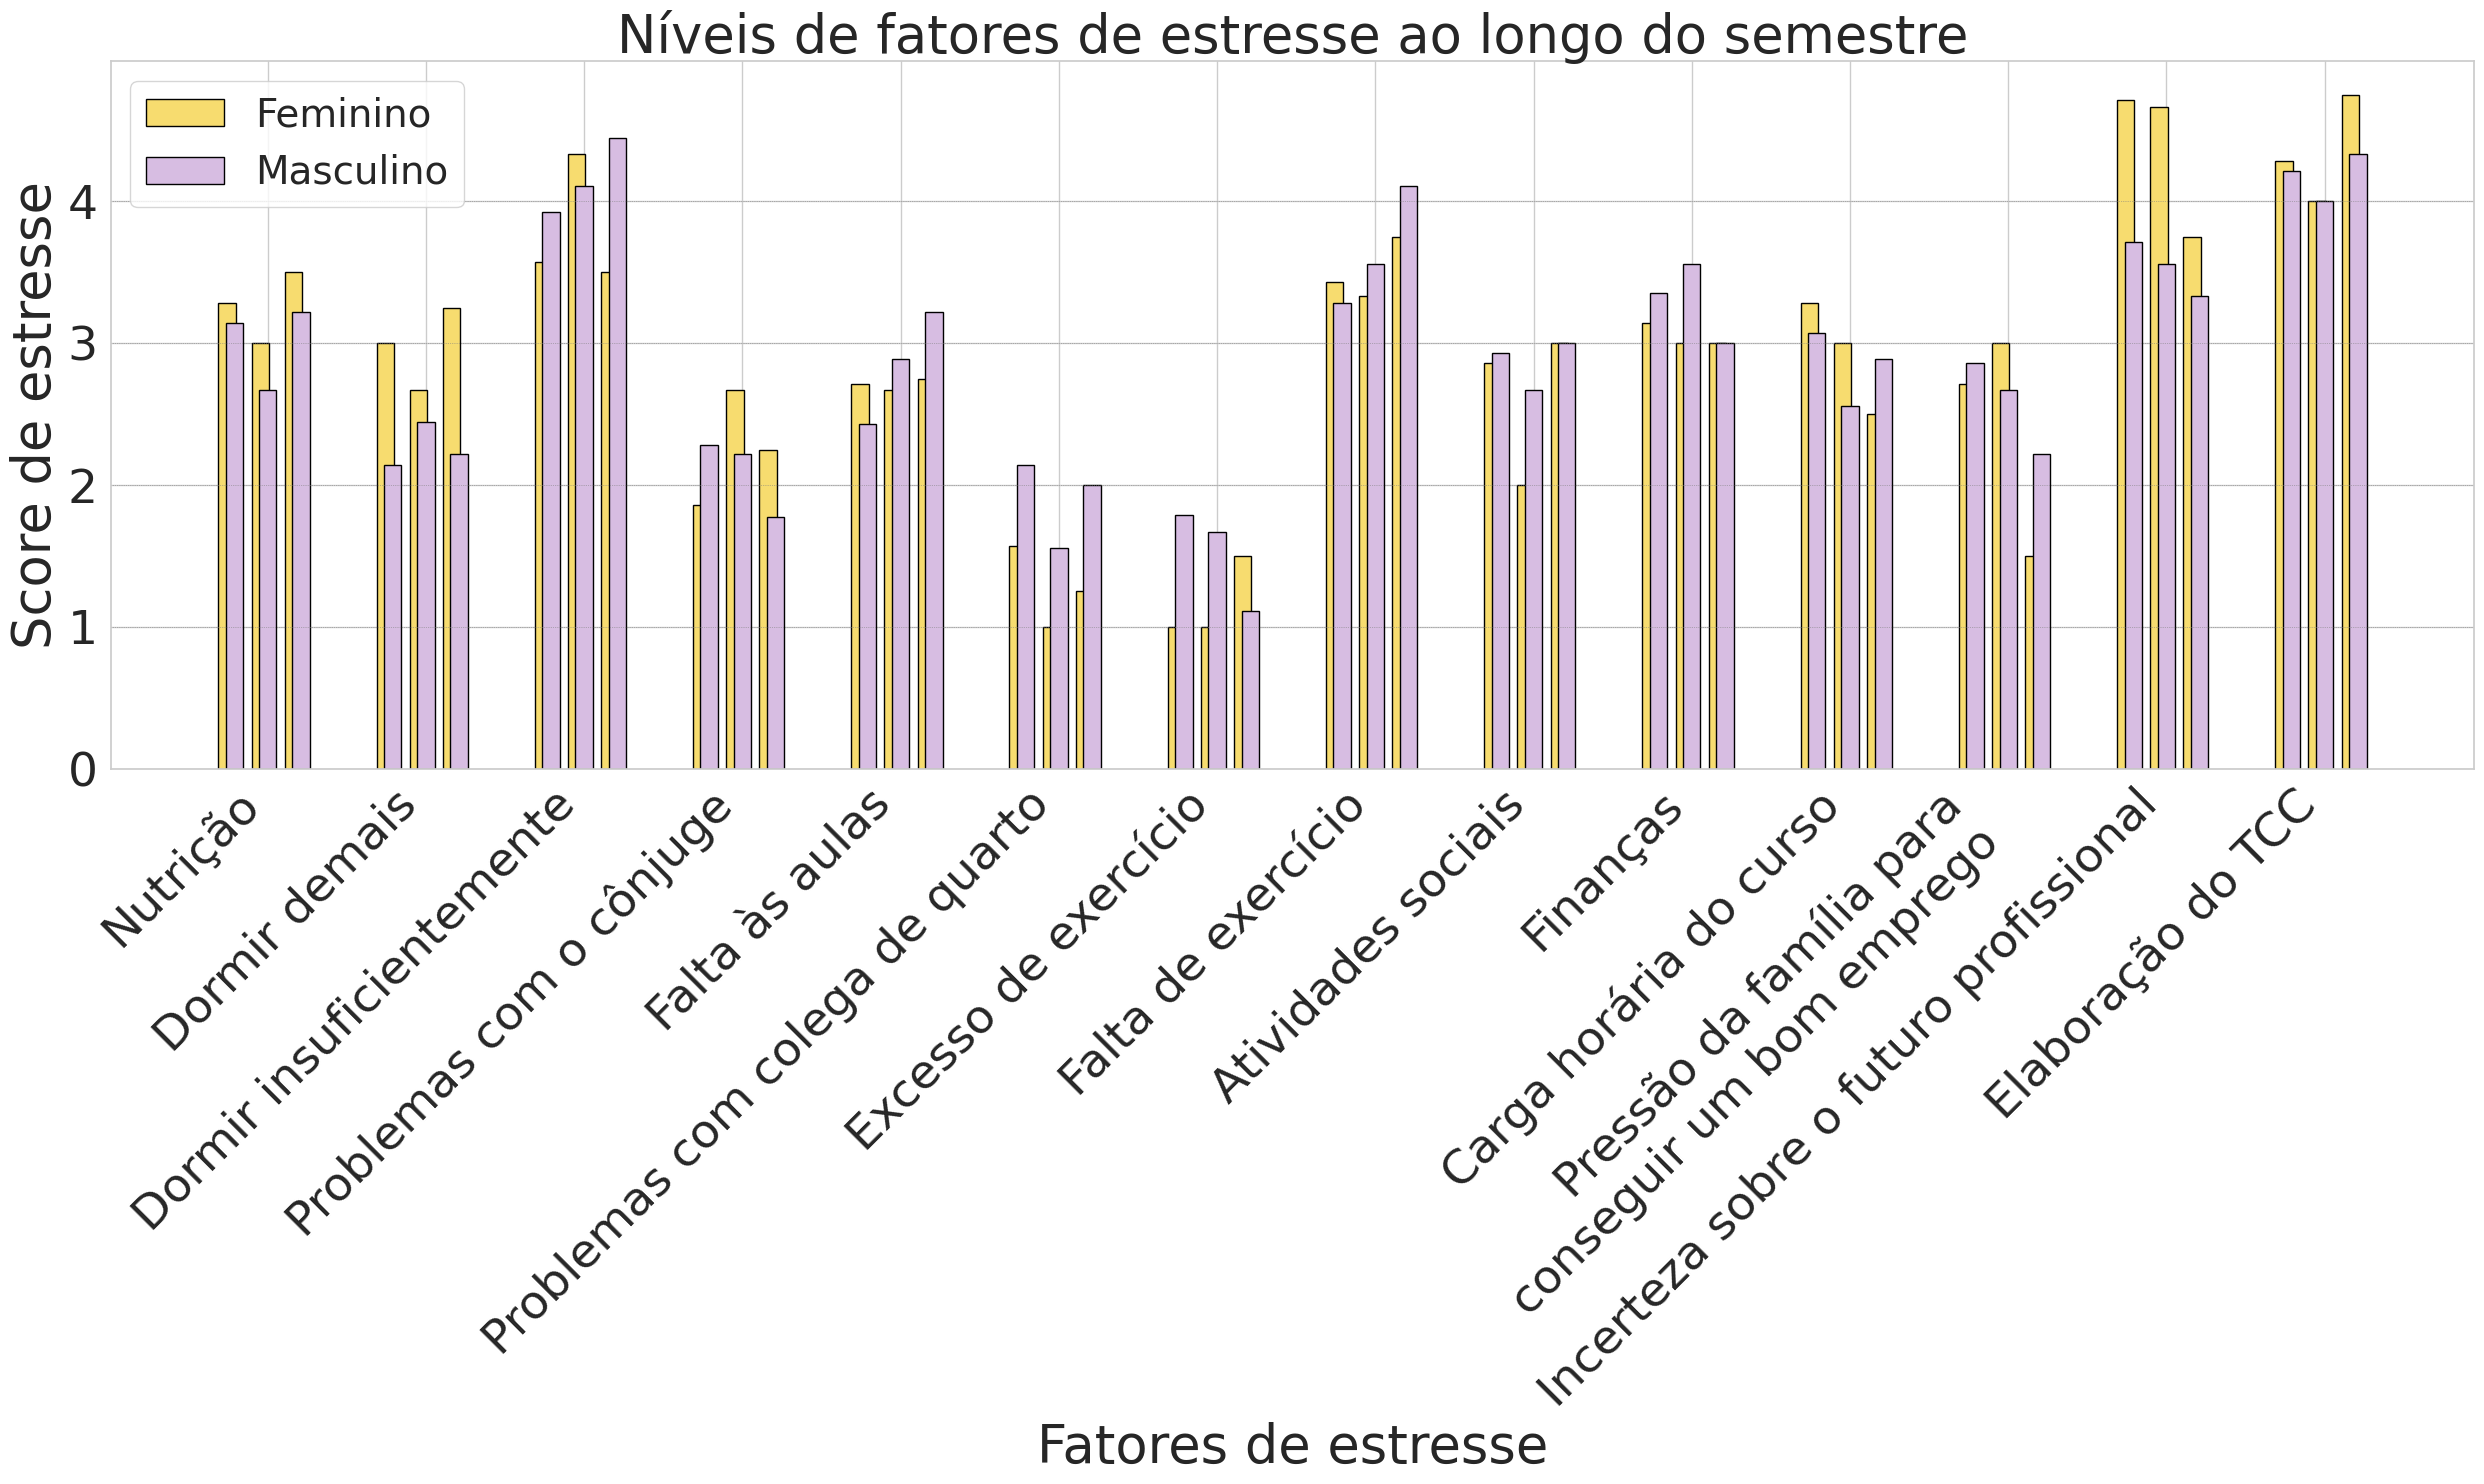

In [117]:
def compute_means_by_gender_and_period(df_start, df_middle, df_end, gender_column='genero'):
    """Calcula as médias dos fatores de estresse por gênero e período."""
    genders = df_start[gender_column].unique()
    data = []

    for gender in genders:
        start_means = df_start[df_start[gender_column] == gender][STRESS_FACTORS].mean()
        middle_means = df_middle[df_middle[gender_column] == gender][STRESS_FACTORS].mean()
        end_means = df_end[df_end[gender_column] == gender][STRESS_FACTORS].mean()

        for factor in STRESS_FACTORS:
            data.append([gender, factor, start_means[factor], middle_means[factor], end_means[factor]])

    means_df = pd.DataFrame(data, columns=[gender_column, 'Fatores de estresse', 'Início', 'Meio', 'Fim'])
    return means_df


def plot_overlapping_bar_chart(df_means, gender_column='genero'):
    periods = ['Início', 'Meio', 'Fim']
    bar_width = 2.2
    r1 = [i*20 for i in range(len(STRESS_FACTORS))]
    gender_colors = ['#F7DC6F', '#D7BDE2']

    fig, ax = plt.subplots(figsize=(25, 15))

    for idx, factor in enumerate(STRESS_FACTORS):
        for period_idx, period in enumerate(periods):
            feminino_value = df_means.iloc[idx][period]
            masculino_value = df_means.iloc[idx + 14][period]

            if period == 'Início':
                offset = -bar_width - 2
            elif period == 'Meio':
                offset = 0
            else:
                offset = bar_width + 2

            ax.bar(r1[idx] + offset - 0.95, feminino_value, width=bar_width, color=gender_colors[0], edgecolor='black', linewidth=1, label=f'Feminino' if idx == 0 and period_idx == 0 else "")
            ax.bar(r1[idx] + offset, masculino_value, width=bar_width, color=gender_colors[1], edgecolor='black', linewidth=1, label=f'Masculino' if idx == 0 and period_idx == 0 else "")

    max_y_value = int(ax.get_ylim()[1]) + 1
    for i in range(max_y_value):
        ax.axhline(y=i, color='gray', linestyle='dotted', linewidth=0.5)

    ax.set_title('Níveis de fatores de estresse ao longo do semestre', fontsize=38)
    ax.set_xticks(r1)
    ax.set_xticklabels([STRESS_LABELS[factor] for factor in STRESS_FACTORS], rotation=45, ha='right', fontsize=34)
    ax.set_ylabel('Score de estresse', fontsize=38)
    ax.set_xlabel('Fatores de estresse', fontsize=38)
    ax.legend(fontsize=28)
    ax.tick_params(axis='y', labelsize=34)

    plt.tight_layout()
    plt.show()

df_means_gender_period = compute_means_by_gender_and_period(df_start, df_middle, df_end)
plot_overlapping_bar_chart(df_means_gender_period)


In [74]:
def create_interactive_table(df_means, stress_factors):
    df_means['Fatores de estresse'] = df_means['Fatores de estresse'].map(stress_factors)

    df_means['Início do semestre'] = df_means['Início do semestre'].round(2)
    df_means['Meio do semestre'] = df_means['Meio do semestre'].round(2)
    df_means['Fim do semestre'] = df_means['Fim do semestre'].round(2)

    fig = go.Figure(data=[go.Table(
        header=dict(values=list(df_means.columns),
                    fill_color='lightgray',
                    align='center'),
        cells=dict(values=[df_means[col] for col in df_means.columns],
                   fill_color='white',
                   align='center'))
    ])

    fig.update_layout(width=1050, height=800)

    fig.show()

create_interactive_table(df_means, stress_factors = STRESS_LABELS)

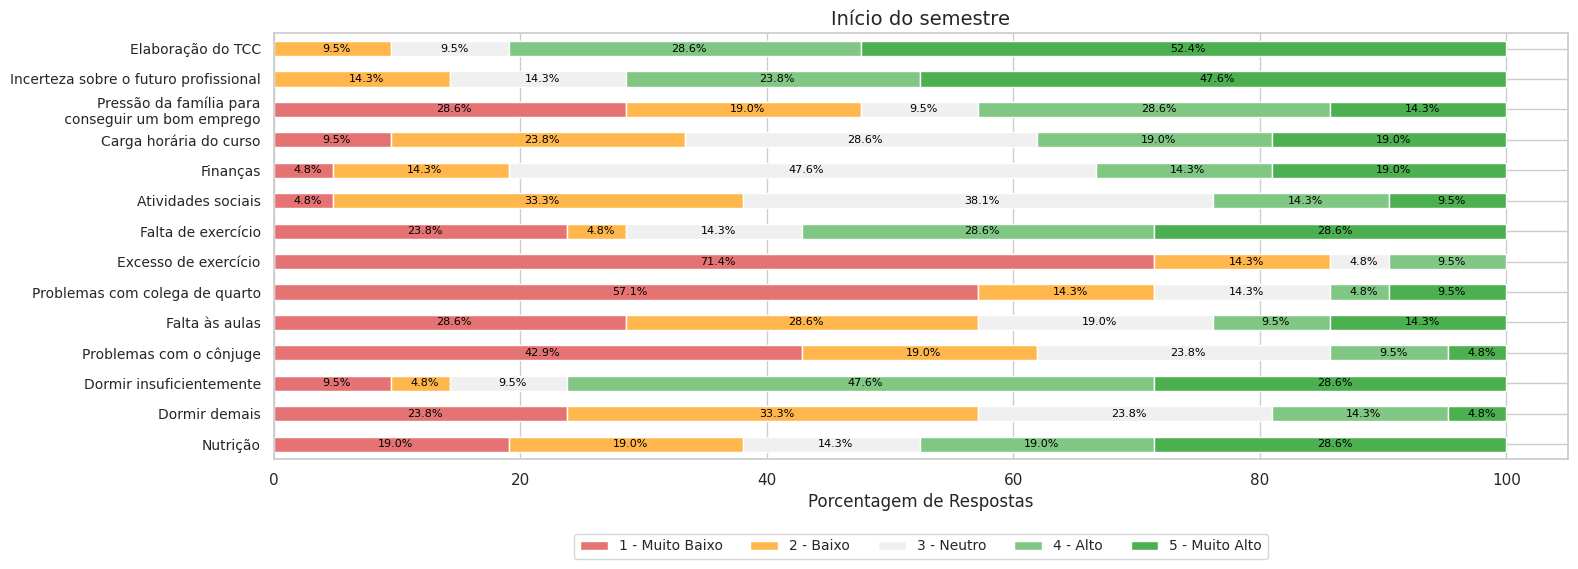

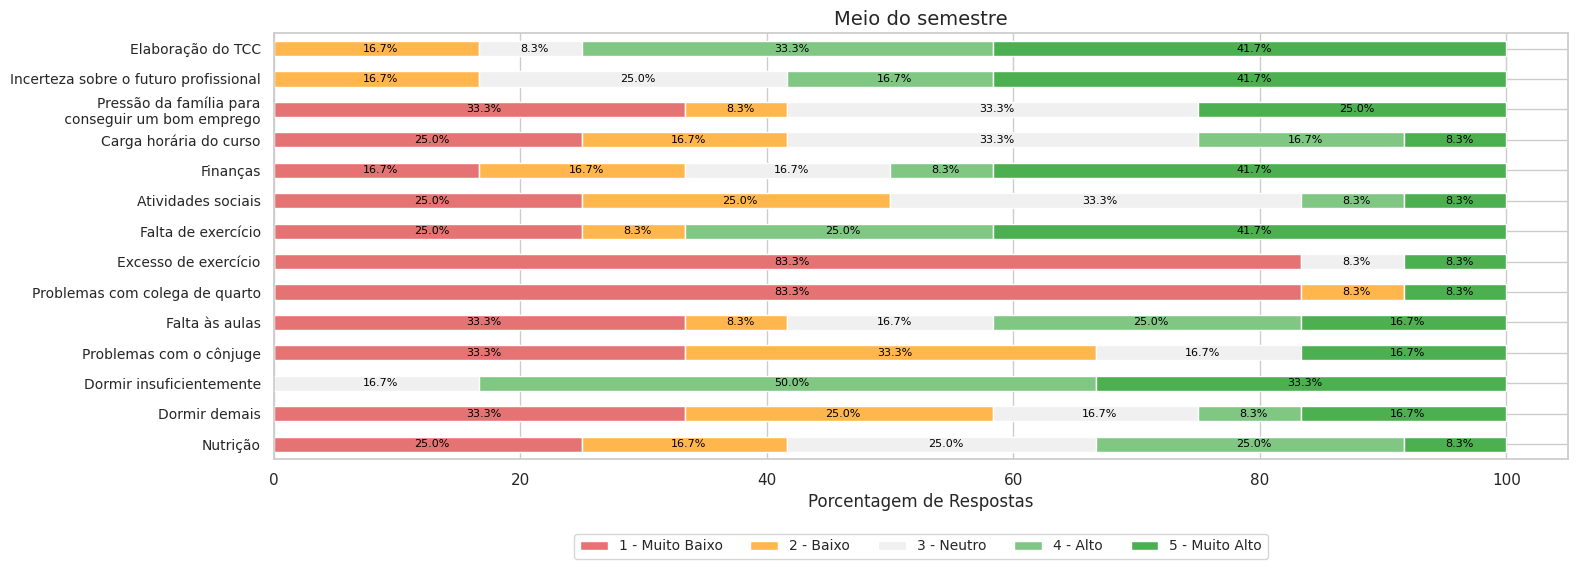

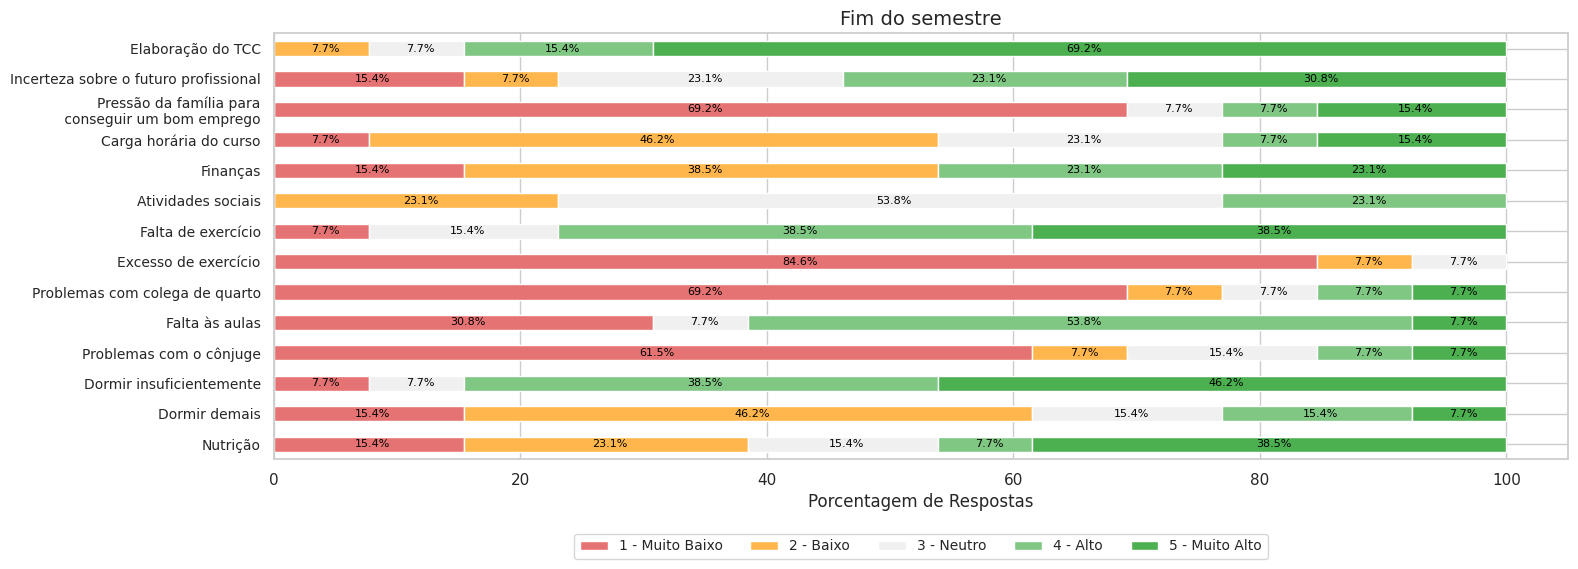

In [118]:
def compute_percentages(df):
    percentages = df[STRESS_FACTORS].apply(lambda x: x.value_counts(normalize=True).sort_index() * 100)
    return percentages

percentages_start = compute_percentages(df_start)
percentages_middle = compute_percentages(df_middle)
percentages_end = compute_percentages(df_end)

def plot_divergent_bar_chart(df, title):
    sorted_factors = STRESS_FACTORS

    colors = ['#e57373', '#ffb74d', '#f0f0f0', '#81c784', '#4caf50']

    fig, ax = plt.subplots(figsize=(16, 6))
    bars = df[sorted_factors].T.plot(kind='barh', stacked=True, color=colors, ax=ax)

    for bar in bars.containers:
        labels = [f"{value:.1f}%" if value != 0 else "" for value in bar.datavalues]
        ax.bar_label(bar, label_type='center', fontsize=8, color='black', fmt='%.1f%%', padding=3, labels=labels)

    ax.set_title(title, fontsize=14)
    ax.set_yticklabels([STRESS_LABELS[factor] for factor in sorted_factors], fontsize=10)
    ax.set_xlabel('Porcentagem de Respostas', fontsize=12)
    ax.legend(['1 - Muito Baixo', '2 - Baixo', '3 - Neutro', '4 - Alto', '5 - Muito Alto'], fontsize=10, loc='lower center', ncol=5, bbox_to_anchor=(0.5, -0.25))
    plt.rcParams.update({'font.size': 14})
    plt.tight_layout()
    plt.show()

plot_divergent_bar_chart(percentages_start, 'Início do semestre')
plot_divergent_bar_chart(percentages_middle, 'Meio do semestre')
plot_divergent_bar_chart(percentages_end, 'Fim do semestre')


      cra  frequencia    percent
2   4 - 6           6   6.593407
3   6 - 8          57  62.637363
4  8 - 10          28  30.769231


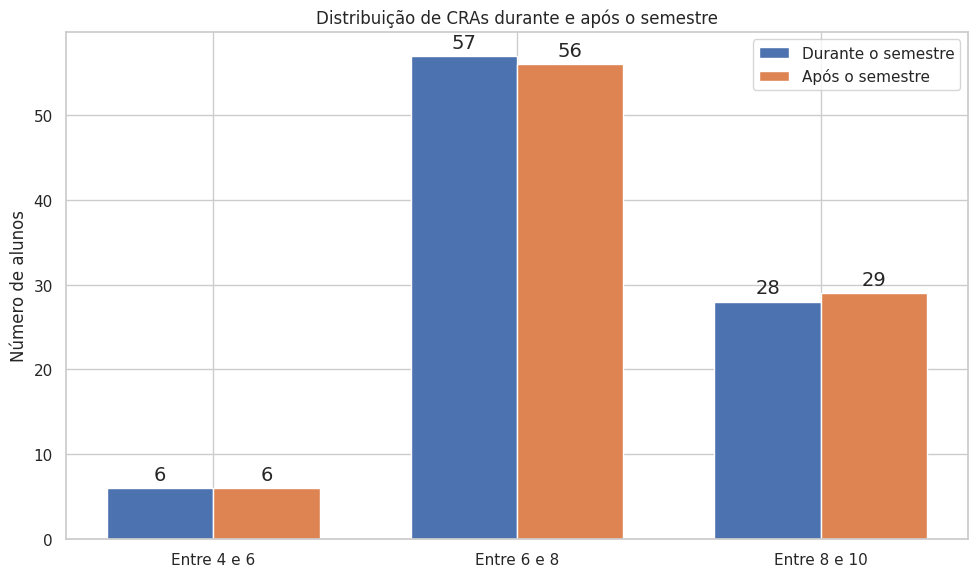

In [119]:
# Dados originais
gpa_list_before = [
    6.83, 5.63, 6.47, 6.04, 6.88, 6.74, 5.89, 6.15, 5.99, 7.58, 6.12, 6.47,
    7.45, 7.24, 5.70, 6.06, 6.08, 6.64, 6.80, 6.84, 6.69, 6.81, 5.49, 6.68,
    6.51, 7.38, 7.31, 5.91, 7.84, 7.32, 7.57, 7.10, 7.72, 7.57, 7.31, 8.26,
    7.01, 9.03, 8.13, 8.24, 7.32, 6.23, 7.35, 7.99, 7.09, 7.60, 6.54, 8.82,
    8.05, 7.66, 8.90, 6.85, 7.33, 7.15, 6.23, 8.32, 8.82, 8.45, 7.88, 7.46,
    7.40, 7.91, 8.36, 8.40, 8.62, 7.16, 7.47, 8.02, 8.31, 8.02, 8.21, 7.70,
    7.51, 7.31, 7.95, 7.82, 7.47, 7.42, 8.33, 7.80, 9.26, 8.68, 8.79, 8.17,
    8.94, 8.38, 8.13, 8.40, 8.38, 8.94, 7.14
]

gpa_list_end = [
    7.37, 8.60, 6.92, 6.71, 7.48, 8.32, 7.70, 7.32, 6.70, 7.57, 7.02, 7.31,
    8.82, 8.45, 8.15, 5.76, 8.23, 7.61, 5.70, 6.96, 6.40, 5.90, 7.52, 8.93,
    5.32, 6.50, 6.06, 7.21, 8.39, 7.45, 8.11, 8.32, 9.23, 7.43, 8.99, 8.49,
    7.43, 7.57, 8.05, 7.73, 8.75, 8.49, 7.19, 7.66, 8.03, 7.95, 7.58, 6.76,
    6.06, 7.71, 7.10, 8.03, 8.41, 8.03, 7.80, 8.14, 6.05, 6.93, 8.36, 7.13,
    6.71, 6.66, 7.87, 7.90, 6.67, 6.18, 7.35, 6.83, 6.88, 7.58, 6.04, 6.64,
    6.69, 7.70, 8.12, 8.24, 6.27, 7.36, 7.48, 8.38, 5.63, 5.73, 6.76, 8.12,
    7.36, 8.80, 6.02, 7.43, 7.41, 9.05, 8.92
]

def create_frequency_table(data, period):
    df = pd.DataFrame({'cra': data, 'period': period})

    bins = [0, 2, 4, 6, 8, 10.01]
    labels = ['0 - 2', '2 - 4', '4 - 6', '6 - 8', '8 - 10']

    df['category'] = pd.cut(df['cra'], bins=bins, labels=labels, include_lowest=True)
    frequency_table = df['category'].value_counts().reset_index()
    frequency_table.columns = ['cra', 'frequencia']
    frequency_table['percent'] = (frequency_table['frequencia'] / frequency_table['frequencia'].sum()) * 100
    frequency_table = frequency_table.sort_values(by='cra').reset_index(drop=True)
    frequency_table = frequency_table[frequency_table['frequencia'] > 0]

    return frequency_table

table_before = create_frequency_table(gpa_list_before, "Antes")
table_after = create_frequency_table(gpa_list_end, "Depois")

print(table_before)

bins = [0, 2, 4, 6, 8, 10.01]

freq_before = np.histogram(gpa_list_before, bins=bins)[0]
freq_after = np.histogram(gpa_list_end, bins=bins)[0]

valid_indices = np.where((freq_before + freq_after) > 0)[0]
freq_before = freq_before[valid_indices]
freq_after = freq_after[valid_indices]
labels = np.array(['0 - 2', '2 - 4', 'Entre 4 e 6', 'Entre 6 e 8', 'Entre 8 e 10'])[valid_indices]

bar_width = 0.35
index = np.arange(len(labels))
colors = [
    (0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
    (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
]


plt.figure(figsize=(10, 6))

bar1 = plt.bar(index, freq_before, bar_width, color=colors[0], label='Durante o semestre')
bar2 = plt.bar(index + bar_width, freq_after, bar_width, color=colors[1], label='Após o semestre')

for bar in bar1 + bar2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, round(yval, 2), ha='center', va='bottom')

plt.xlabel('')
plt.ylabel('Número de alunos')
plt.title('Distribuição de CRAs durante e após o semestre')
plt.xticks(index + bar_width/2, labels)
plt.rcParams.update({'font.size': 14})
plt.legend()

plt.tight_layout()
plt.show()


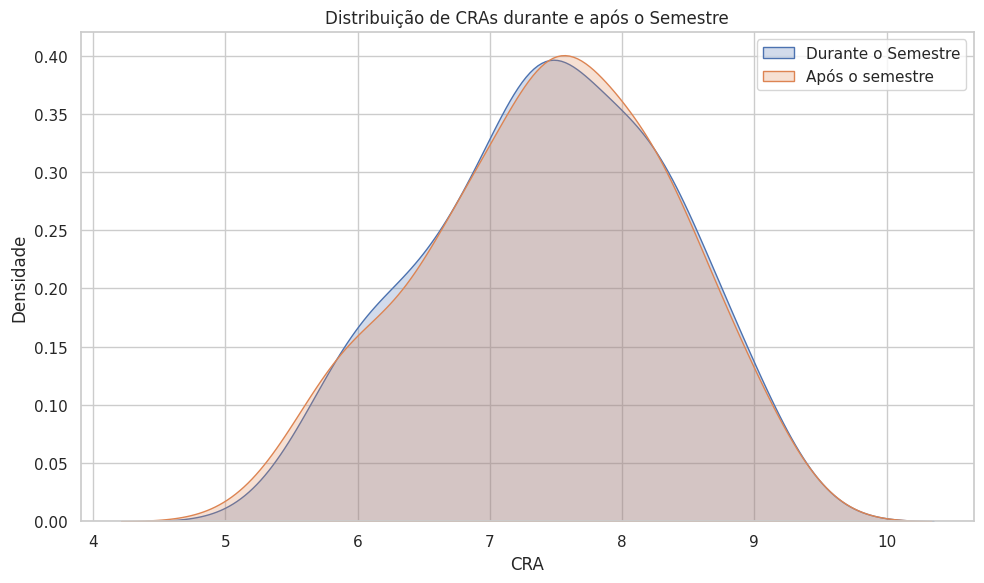

In [77]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))

sns.kdeplot(gpa_list_before, label='Durante o Semestre', fill=True)

sns.kdeplot(gpa_list_end, label='Após o semestre', fill=True)

plt.title('Distribuição de CRAs durante e após o Semestre')
plt.xlabel('CRA')
plt.ylabel('Densidade')
plt.legend()
plt.tight_layout()
plt.show()


In [78]:
variance_before = np.var(gpa_list_before)
variance_end = np.var(gpa_list_end)

print(f"Variância durante o semestre: {variance_before}")
print(f"Variância após o semestre: {variance_end}")


Variância durante o semestre: 0.8000097814273639
Variância após o semestre: 0.8193735780702815


In [79]:
import scipy.stats as stats

dataframes = [df_start.copy(), df_middle.copy(), df_end.copy()]

invert_columns = ["pss_confiante_problemas", "pss_coisas_jeito",
                 "pss_controle_irritacoes", "pss_controle_geral"]

def invert_likert(val):
    mapping = {1: 5, 2: 4, 3: 3, 4: 2, 5: 1}
    return mapping[val]

medians = []
sum_pss_values = []

for df in dataframes:
    for col in invert_columns:
        df[col] = df[col].apply(invert_likert)

    pss_columns = ["pss_chateado_inesperado", "pss_controle_coisas", "pss_nervoso_estressado",
                   "pss_confiante_problemas", "pss_coisas_jeito", "pss_nao_lidar_coisas",
                   "pss_controle_irritacoes", "pss_controle_geral", "pss_irritado_fora_controle",
                   "pss_dificuldades_acumuladas"]

    df[pss_columns] = df[pss_columns].transform(lambda x: x-1)
    df['sum_pss'] = df[pss_columns].sum(axis=1)

    medians.append(df['sum_pss'].mean())
    sum_pss_values.append(df['sum_pss'].values)

f_statistic, p_value = stats.f_oneway(*sum_pss_values)

print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("Rejeitamos a hipótese nula. Há uma diferença significativa no nível de estresse percebido entre os alunos no início, meio e no final do semestre.")
else:
    print("Não rejeitamos a hipótese nula. Não há diferença significativa no nível de estresse percebido entre os alunos no início, meio e no final do semestre.")

print()

median_start, median_middle, median_end = medians
print(median_start)
print(median_middle)
print(median_end)

F-statistic: 0.10947683451120625
P-value: 0.8965519392541522
Não rejeitamos a hipótese nula. Não há diferença significativa no nível de estresse percebido entre os alunos no início, meio e no final do semestre.

27.61904761904762
26.416666666666668
27.53846153846154


In [80]:
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

def calculate_vif(df, factors):
    X = add_constant(df[factors])

    vif_data = pd.DataFrame()
    vif_data["Variable"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return vif_data

def display_model_summary(df, response_var, factors):
    y = df[response_var]
    X = df[factors]
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
    print(model.summary())

# Lista de fatores
# meio do período
# factors = [
#     "nutricao", "problemas_relacionamento", "falta_aulas",
#     "problemas_colega_quarto", "atividades_sociais",
#     "carga_horaria_curso", "pressao_familia_emprego", "incerteza_futuro_profissional", "elaboracao_tcc"
# ]

factors = ['dormir_demais', 'falta_aulas', 'excesso_exercicio', 'falta_exercicio', 'financas', 'pressao_familia_emprego', 'incerteza_futuro_profissional', 'elaboracao_tcc']

# Supondo que você já tenha seus dataframes
df_start, df_middle, df_end = dataframes

# Exibindo VIF e resumo do modelo para cada dataframe
for df, label in zip([df_start, df_middle, df_end], ["início", "meio", "fim"]):
    print(f"VIF para o {label} do semestre:\n", calculate_vif(df, factors))
    print(f"\nResumo do modelo para o {label} do semestre:")
    display_model_summary(df, 'sum_pss', factors)
    print("\n" + "="*80 + "\n")

VIF para o início do semestre:
                         Variable         VIF
0                          const  146.797614
1                  dormir_demais    1.306176
2                    falta_aulas    2.539306
3              excesso_exercicio    2.457455
4                falta_exercicio    1.867407
5                       financas    2.981606
6        pressao_familia_emprego    1.436865
7  incerteza_futuro_profissional    1.735457
8                 elaboracao_tcc    1.530176

Resumo do modelo para o início do semestre:
                            OLS Regression Results                            
Dep. Variable:                sum_pss   R-squared:                       0.568
Model:                            OLS   Adj. R-squared:                  0.279
Method:                 Least Squares   F-statistic:                     1.970
Date:                Thu, 26 Oct 2023   Prob (F-statistic):              0.140
Time:                        03:33:05   Log-Likelihood:                -61.461

In [81]:
import statsmodels.api as sm
from itertools import combinations
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

def display_model_summary(X, y):
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
    return model

def calculate_threshold(df, response_var):
    mean_response = df[response_var].mean()
    baseline_mse = mean_squared_error(df[response_var], [mean_response] * len(df))
    return 0.9 * baseline_mse

def calculate_best_model(df, response_var, factors):
    best_aic = np.inf
    best_factors = None
    best_model = None
    THRESHOLD = calculate_threshold(df, response_var)

    for r in range(1, len(factors) + 1):
        for variables in combinations(factors, r):
            X = df[list(variables)]
            y = df[response_var]
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
            model = display_model_summary(X_train, y_train)
            y_pred = model.predict(sm.add_constant(X_test))
            mse = mean_squared_error(y_test, y_pred)
            if model.aic < best_aic and model.rsquared < 0.99 and mse < THRESHOLD:
                best_aic = model.aic
                best_factors = variables
                best_model = model

    return best_factors, best_aic, best_model

factors = [
    "nutricao", "dormir_demais", "dormir_insuficiente", "problemas_relacionamento", "falta_aulas",
    "problemas_colega_quarto", "excesso_exercicio", "falta_exercicio", "atividades_sociais", "financas",
    "carga_horaria_curso", "pressao_familia_emprego", "incerteza_futuro_profissional", "elaboracao_tcc"
]

df_start, df_middle, df_end = dataframes

for df, label in zip([df_start, df_middle, df_end], ["início", "meio", "fim"]):
    best_factors, best_aic, best_model = calculate_best_model(df, 'sum_pss', factors)
    print(f"For {label}: Best AIC: {best_aic} with factors: {best_factors}")
    print(best_model.summary())


For início: Best AIC: 69.23338455056826 with factors: ('nutricao', 'dormir_demais', 'dormir_insuficiente', 'problemas_relacionamento', 'falta_aulas', 'problemas_colega_quarto', 'excesso_exercicio', 'financas', 'carga_horaria_curso', 'pressao_familia_emprego')
                            OLS Regression Results                            
Dep. Variable:                sum_pss   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     6.833
Date:                Thu, 26 Oct 2023   Prob (F-statistic):             0.0703
Time:                        03:35:34   Log-Likelihood:                -23.617
No. Observations:                  14   AIC:                             69.23
Df Residuals:                       3   BIC:                             76.26
Df Model:                          10                                         
Covariance Type:            n

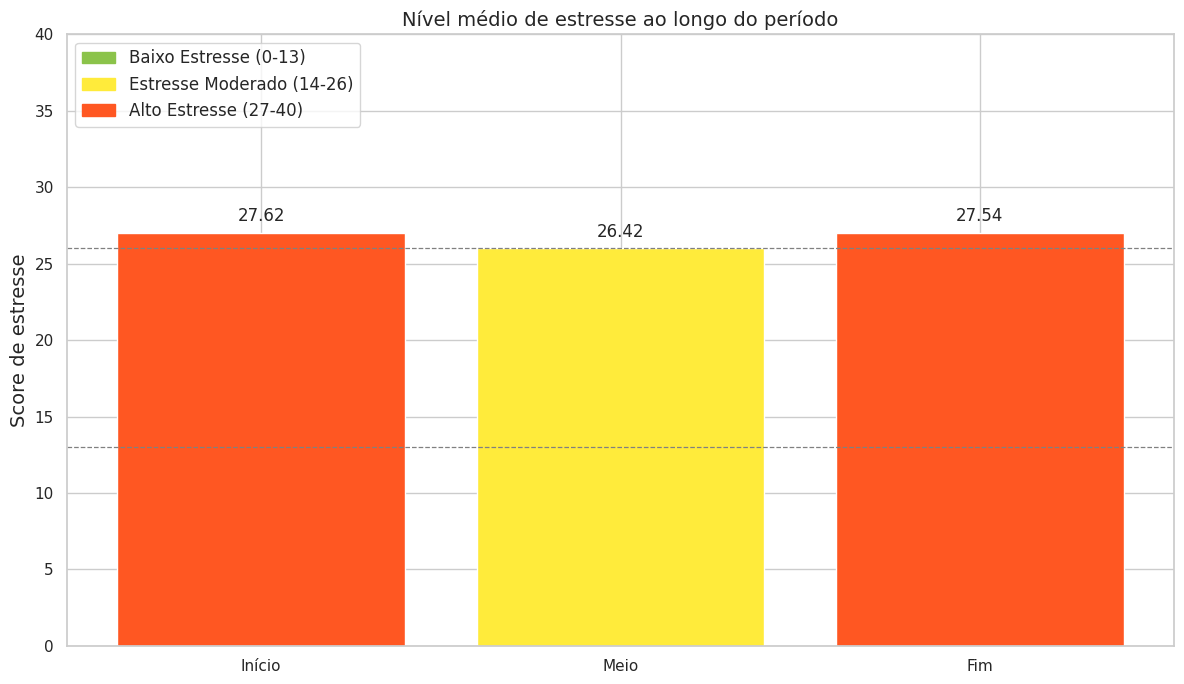

In [82]:
import matplotlib.pyplot as plt
import numpy as np

medians = [median_start, median_middle, median_end]

labels = ['Início', 'Meio', 'Fim']

floor_medians = np.floor(medians)
colors = ['#8BC34A' if x <= 13 else '#FFEB3B' if x <= 26 else '#FF5722' for x in floor_medians]

plt.figure(figsize=(12, 7))
bars = plt.bar(labels, floor_medians, color=colors)

plt.title('Nível médio de estresse ao longo do período', fontsize=14)
plt.ylabel('Score de estresse', fontsize=14)
plt.ylim(0, 40)

for i, bar in enumerate(bars):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, round(medians[i], 2),
             ha='center', va='bottom', fontsize=12)

for threshold in [13, 26]:
    plt.axhline(y=threshold, color='grey', linestyle='--', linewidth=0.9)

green_patch = mpatches.Patch(color='#8BC34A', label='Baixo Estresse (0-13)')
yellow_patch = mpatches.Patch(color='#FFEB3B', label='Estresse Moderado (14-26)')
red_patch = mpatches.Patch(color='#FF5722', label='Alto Estresse (27-40)')
plt.legend(handles=[green_patch, yellow_patch, red_patch], fontsize=12, loc='upper left')

plt.tight_layout()
plt.show()


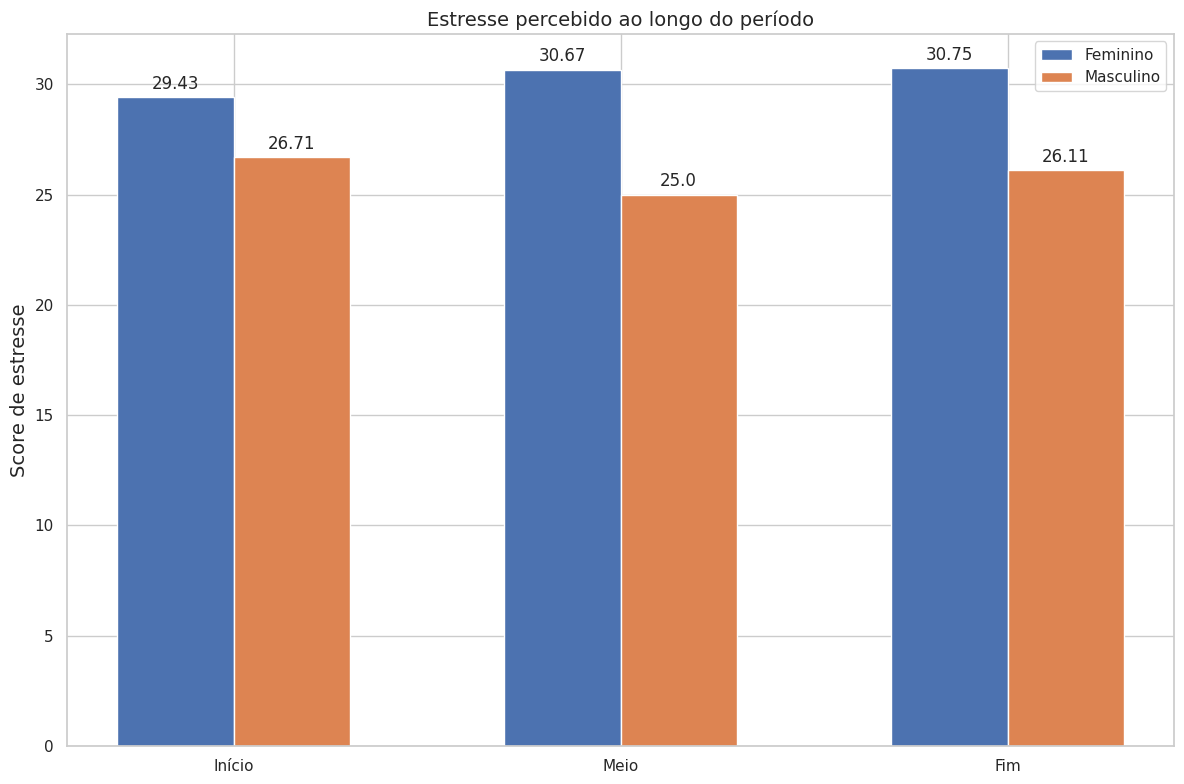

In [83]:
def plot_stress_by_group(dataframes, group_by, prefix = None):
    mean_start = dataframes[0].groupby(group_by)['sum_pss'].sum() / dataframes[0].groupby(group_by)['sum_pss'].size()
    mean_middle = dataframes[1].groupby(group_by)['sum_pss'].sum() / dataframes[1].groupby(group_by)['sum_pss'].size()
    mean_end = dataframes[2].groupby(group_by)['sum_pss'].sum() / dataframes[2].groupby(group_by)['sum_pss'].size()

    labels = ['Início', 'Meio', 'Fim']
    groups = mean_start.index
    x = np.arange(len(labels))
    width = 0.3

    fig, ax = plt.subplots(figsize=(12, 8))

    for i, group in enumerate(groups):
        means = [mean_start[group], mean_middle[group], mean_end[group]]
        ax.bar(x + i*width, means, width, label=prefix + ' ' + group.lower() if prefix else group)

    def autolabel(rects):
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(round(height, 2)),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),
                        textcoords="offset points",
                        ha='center', va='bottom')

    for rect_set in ax.containers:
        autolabel(rect_set)

    ax.set_ylabel('Score de estresse', fontsize=14)
    ax.set_title('Estresse percebido ao longo do período', fontsize=14)
    ax.set_xticks(x + width*(len(groups)-1)/2)
    ax.set_xticklabels(labels)
    ax.legend()

    plt.tight_layout()
    plt.show()

plot_stress_by_group(dataframes, 'genero')

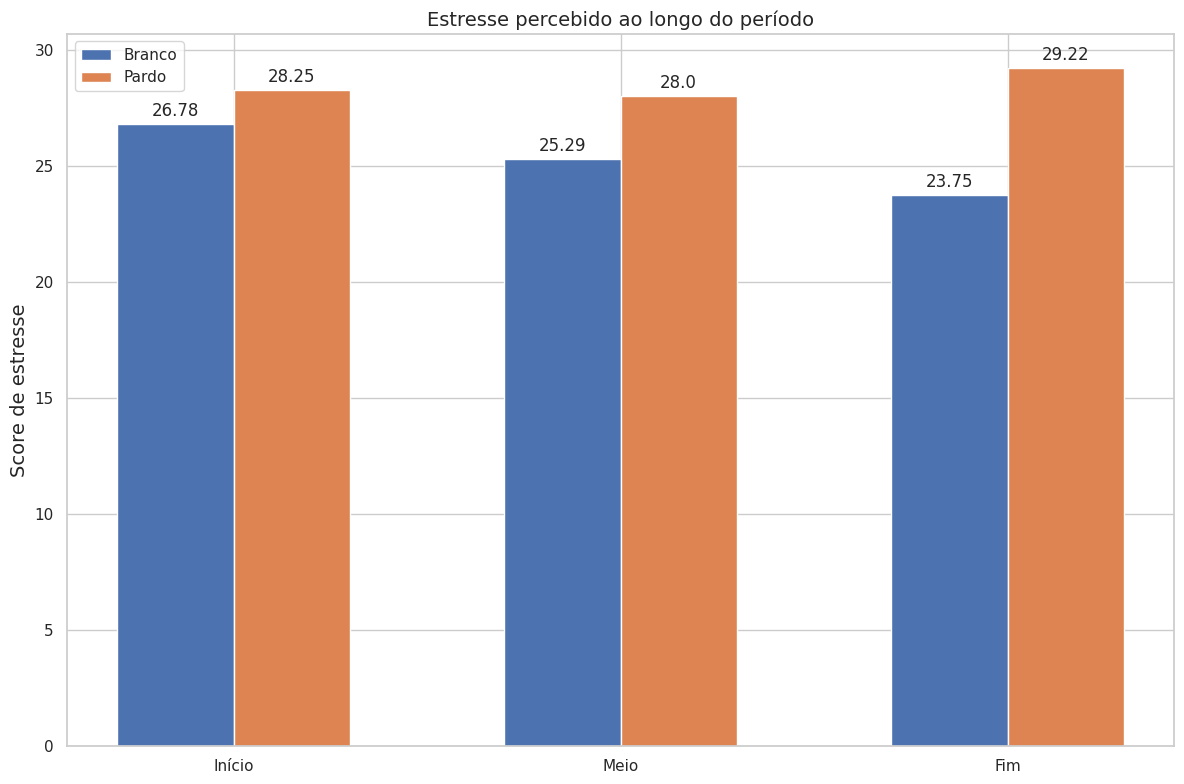

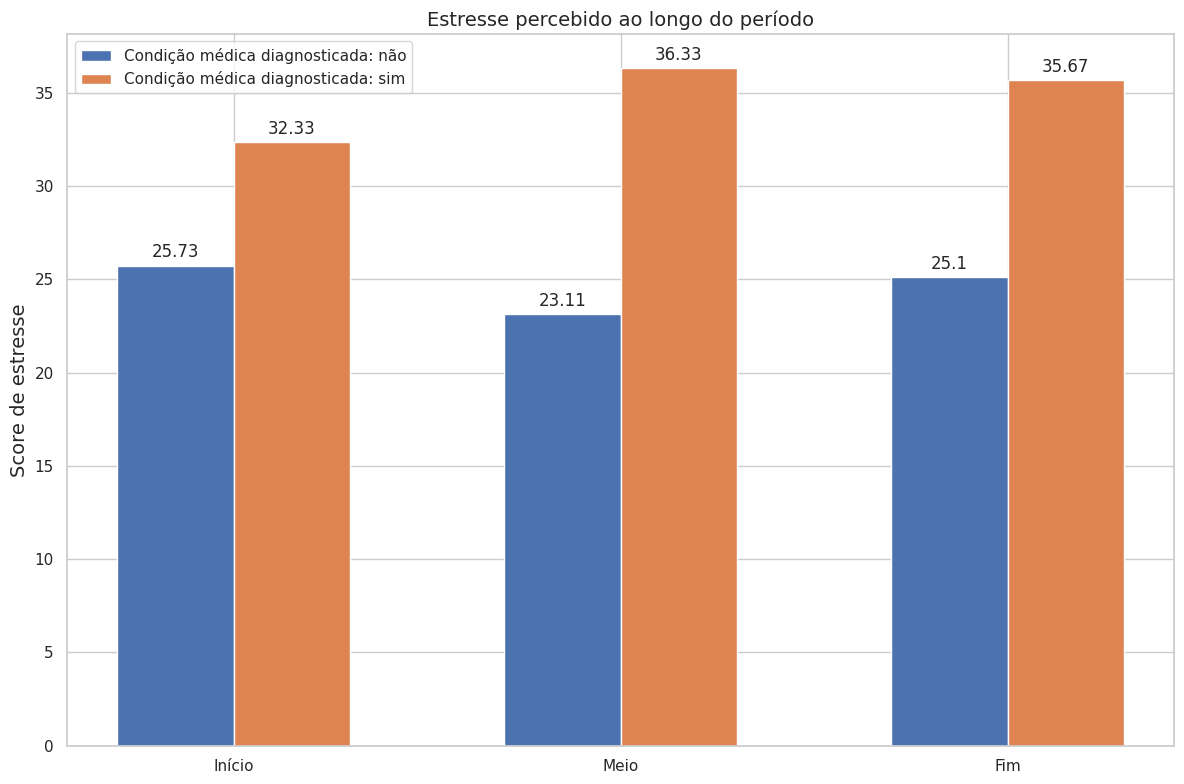

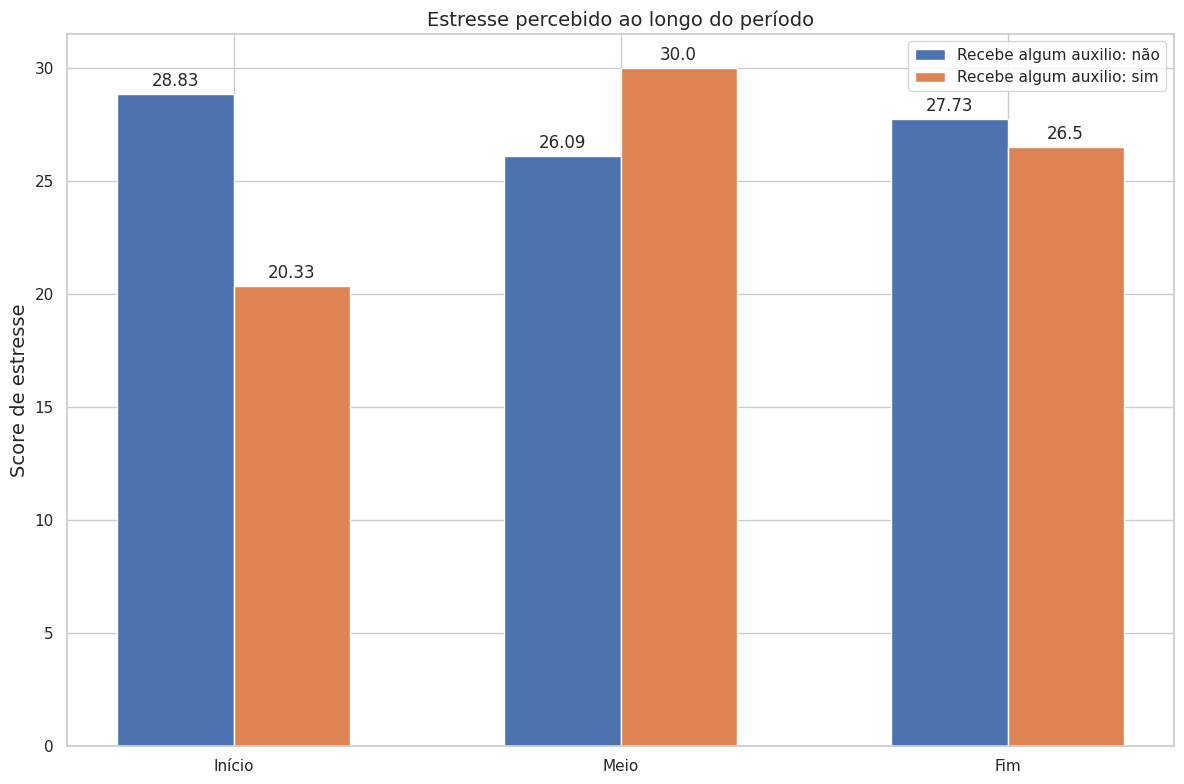

In [84]:
plot_stress_by_group(dataframes, 'auto_declaracao')
plot_stress_by_group(dataframes, 'deficiencia_condicao_medica', prefix='Condição médica diagnosticada:')
plot_stress_by_group(dataframes, 'auxilio_prac', prefix='Recebe algum auxilio:')

In [85]:
import scipy.stats as stats

beginning = dataframes[0]['sum_pss'].values
middle = dataframes[1]['sum_pss'].values
end = dataframes[2]['sum_pss'].values

f_statistic, p_value = stats.f_oneway(beginning, middle, end)

alpha = 0.05
if p_value < alpha:
    print("Rejeitamos a hipótese nula. Há uma diferença significativa no nível de estresse percebido entre os três períodos.")
else:
    print("Não podemos rejeitar a hipótese nula. Não há uma diferença significativa no nível de estresse percebido entre os três períodos.")

print(f"Valor F: {f_statistic}")
print(f"Valor p: {p_value}")


Não podemos rejeitar a hipótese nula. Não há uma diferença significativa no nível de estresse percebido entre os três períodos.
Valor F: 0.10947683451120625
Valor p: 0.8965519392541522


In [86]:
import numpy as np
import scipy.stats as stats

df_start, df_middle, df_end = dataframes

sample_pss_values = [df_start['sum_pss'].tolist(), df_middle['sum_pss'].tolist(), df_end['sum_pss'].tolist()]

gpa_population_delta = np.mean(np.array(gpa_list_end) - np.array(gpa_list_before))

correlations = []

for i, (pss, df) in enumerate(zip(sample_pss_values, [df_start, df_middle, df_end])):
    reported_gpa_deltas = df['cra'] - gpa_population_delta
    corr, _ = stats.pearsonr(pss, reported_gpa_deltas)
    correlations.append(corr)
    print(f"Correlação entre PSS e variação de CRA para a survey {i + 1}:", corr)

print()
for i, (pss, df) in enumerate(zip(sample_pss_values, [df_start, df_middle, df_end])):
    reported_gpa_deltas = df['cra'] - gpa_population_delta
    corr, p_value = stats.pearsonr(pss, reported_gpa_deltas)

    if p_value < 0.05:
        print(f"Para a survey {i + 1}, a correlação de {corr:.3f} é estatisticamente significativa com p = {p_value:.3f}")
    else:
        print(f"Para a survey {i + 1}, a correlação de {corr:.3f} não é estatisticamente significativa com p = {p_value:.3f}")


Correlação entre PSS e variação de CRA para a survey 1: -0.16436839178279689
Correlação entre PSS e variação de CRA para a survey 2: -0.3316953595380996
Correlação entre PSS e variação de CRA para a survey 3: -0.5919235572136267

Para a survey 1, a correlação de -0.164 não é estatisticamente significativa com p = 0.476
Para a survey 2, a correlação de -0.332 não é estatisticamente significativa com p = 0.292
Para a survey 3, a correlação de -0.592 é estatisticamente significativa com p = 0.033


In [87]:
import pandas as pd
import numpy as np
import scipy.stats as stats

df = pd.concat([dataframes[0], dataframes[1], dataframes[2]], ignore_index=True)

import pandas as pd
from scipy.stats import spearmanr


gpa_population_delta = np.mean(np.array(gpa_list_end) - np.array(gpa_list_before))
df['cra_delta'] = df['cra'] - gpa_population_delta

stress_factors = ["nutricao", "dormir_demais", "dormir_insuficiente", "problemas_relacionamento", "falta_aulas",
                  "problemas_colega_quarto", "excesso_exercicio", "falta_exercicio", "atividades_sociais", "financas",
                  "carga_horaria_curso", "pressao_familia_emprego", "incerteza_futuro_profissional", "elaboracao_tcc"]

results = {}

for factor in stress_factors:
    corr, p_value = spearmanr(df[factor], df['cra_delta'])
    results[factor] = (corr, p_value)

for factor, (corr, p_value) in results.items():
    if p_value < 0.05:
        print(f"\033[1m{factor}\033[0m: Associação estatisticamente significativa com p = \033[1m{p_value:.4f}\033[0m, correlação = \033[1m{corr:.3f}\033[0m")
    else:
        print(f"{factor}: Não há associação estatisticamente significativa com p = {p_value:.4f}, correlação = {corr:.3f}")

nutricao: Associação estatisticamente significativa com p = 0.0031, correlação = -0.427
dormir_demais: Não há associação estatisticamente significativa com p = 0.2108, correlação = -0.188
dormir_insuficiente: Não há associação estatisticamente significativa com p = 0.2566, correlação = -0.171
problemas_relacionamento: Não há associação estatisticamente significativa com p = 0.9322, correlação = -0.013
falta_aulas: Associação estatisticamente significativa com p = 0.0057, correlação = -0.402
problemas_colega_quarto: Não há associação estatisticamente significativa com p = 0.6953, correlação = -0.059
excesso_exercicio: Não há associação estatisticamente significativa com p = 0.0532, correlação = -0.287
falta_exercicio: Não há associação estatisticamente significativa com p = 0.7799, correlação = 0.042
atividades_sociais: Não há associação estatisticamente significativa com p = 0.8228, correlação = -0.034
financas: Associação estatisticamente significativa com p = 0.0009, correlação = -0.

In [88]:
def bootstrap_corr(data, factor, iterations=10000):
    bootstrapped_corrs = []

    for _ in range(iterations):
        sample = data.sample(n=len(data), replace=True)
        corr, _ = spearmanr(sample[factor], sample['cra_delta'])
        bootstrapped_corrs.append(corr)

    return bootstrapped_corrs

stress_factors = ["nutricao", "dormir_demais", "dormir_insuficiente", "problemas_relacionamento", "falta_aulas",
                  "problemas_colega_quarto", "excesso_exercicio", "falta_exercicio", "atividades_sociais", "financas",
                  "carga_horaria_curso", "pressao_familia_emprego", "incerteza_futuro_profissional", "elaboracao_tcc"]

def text_to_bold(text):
  return '\033[1m' + str(text) + '\033[0m'

def print_interval(factor, lower, upper):
  has_correlation = lower * upper > 0

  if has_correlation:
    print(f"{text_to_bold(factor)}: Intervalo de confiança de 95% para a correlação: ({text_to_bold(lower)}, {text_to_bold(upper)})")
    return

  print(f"{factor}: Intervalo de confiança de 95% para a correlação: ({lower:.3f}, {upper:.3f})")


for factor in stress_factors:
    bootstrapped_corrs = bootstrap_corr(df, factor)

    lower = np.percentile(bootstrapped_corrs, 2.5)
    upper = np.percentile(bootstrapped_corrs, 97.5)

    # print(f"{factor}: Intervalo de confiança de 95% para a correlação: ({lower:.3f}, {upper:.3f})")
    print_interval(factor, round(lower, 3), round(upper, 3))


nutricao: Intervalo de confiança de 95% para a correlação: (-0.629, -0.186)
dormir_demais: Intervalo de confiança de 95% para a correlação: (-0.448, 0.094)
dormir_insuficiente: Intervalo de confiança de 95% para a correlação: (-0.430, 0.113)
problemas_relacionamento: Intervalo de confiança de 95% para a correlação: (-0.331, 0.331)
falta_aulas: Intervalo de confiança de 95% para a correlação: (-0.619, -0.138)
problemas_colega_quarto: Intervalo de confiança de 95% para a correlação: (-0.385, 0.300)
excesso_exercicio: Intervalo de confiança de 95% para a correlação: (-0.540, 0.008)
falta_exercicio: Intervalo de confiança de 95% para a correlação: (-0.249, 0.330)
atividades_sociais: Intervalo de confiança de 95% para a correlação: (-0.328, 0.281)
financas: Intervalo de confiança de 95% para a correlação: (-0.663, -0.227)
carga_horaria_curso: Intervalo de confiança de 95% para a correlação: (-0.601, -0.105)
pressao_familia_emprego: Intervalo de confiança de 95% para a correlação: (-0.695, -

In [89]:
import statsmodels.api as sm
import pandas as pd

def run_regression(dataframes, target_var, independent_vars, period_names=['Início', 'Meio', 'Fim']):
    for df, periodo in zip(dataframes, period_names):
        print(f"Análise para o período: {periodo}")

        df_encoded = pd.get_dummies(df[independent_vars], drop_first=True)

        X = df_encoded
        y = df[target_var]

        X = sm.add_constant(X)

        model = sm.OLS(y, X).fit()

        print(model.summary())
        print("\n" + "-"*50 + "\n")

run_regression(dataframes, 'incerteza_futuro_profissional', ['genero', 'auto_declaracao', 'ensino_medio', 'deficiencia_condicao_medica', 'auxilio_prac', 'cra'])

Análise para o período: Início
                                  OLS Regression Results                                 
Dep. Variable:     incerteza_futuro_profissional   R-squared:                       0.711
Model:                                       OLS   Adj. R-squared:                  0.555
Method:                            Least Squares   F-statistic:                     4.560
Date:                           Thu, 26 Oct 2023   Prob (F-statistic):            0.00900
Time:                                   03:42:43   Log-Likelihood:                -18.589
No. Observations:                             21   AIC:                             53.18
Df Residuals:                                 13   BIC:                             61.53
Df Model:                                      7                                         
Covariance Type:                       nonrobust                                         
                                                     coef    std err 

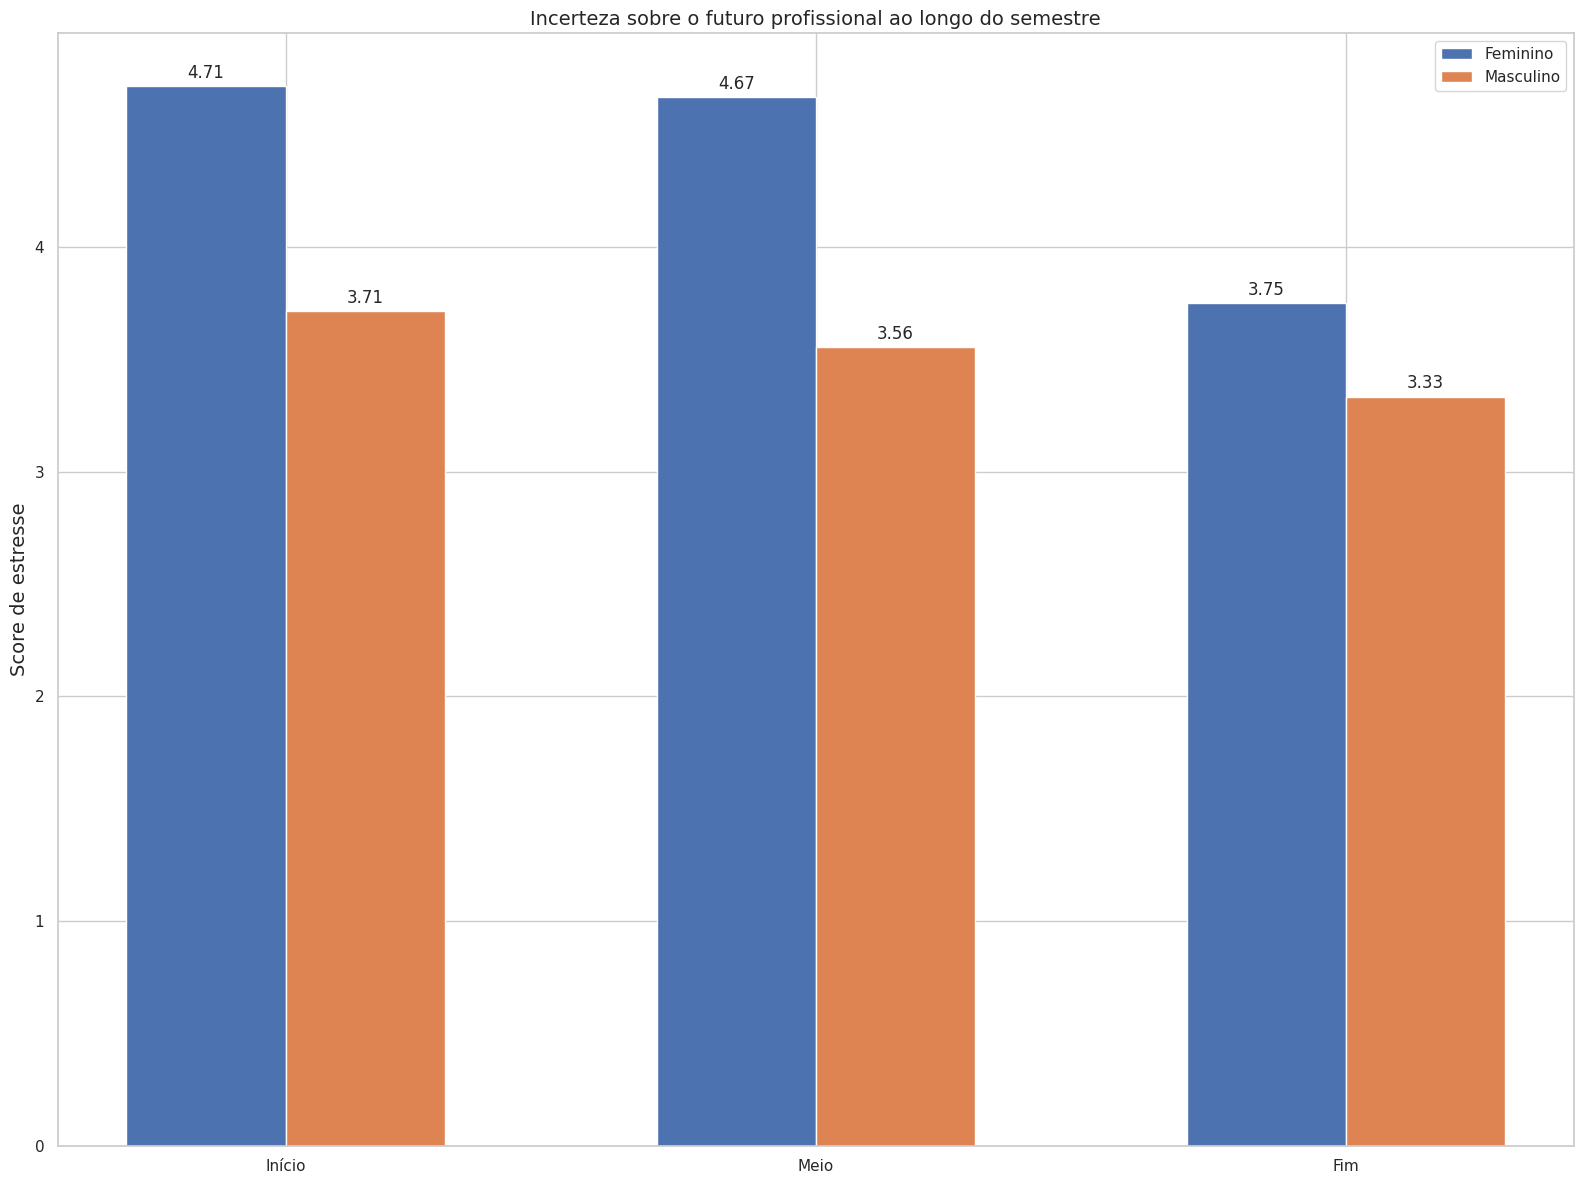

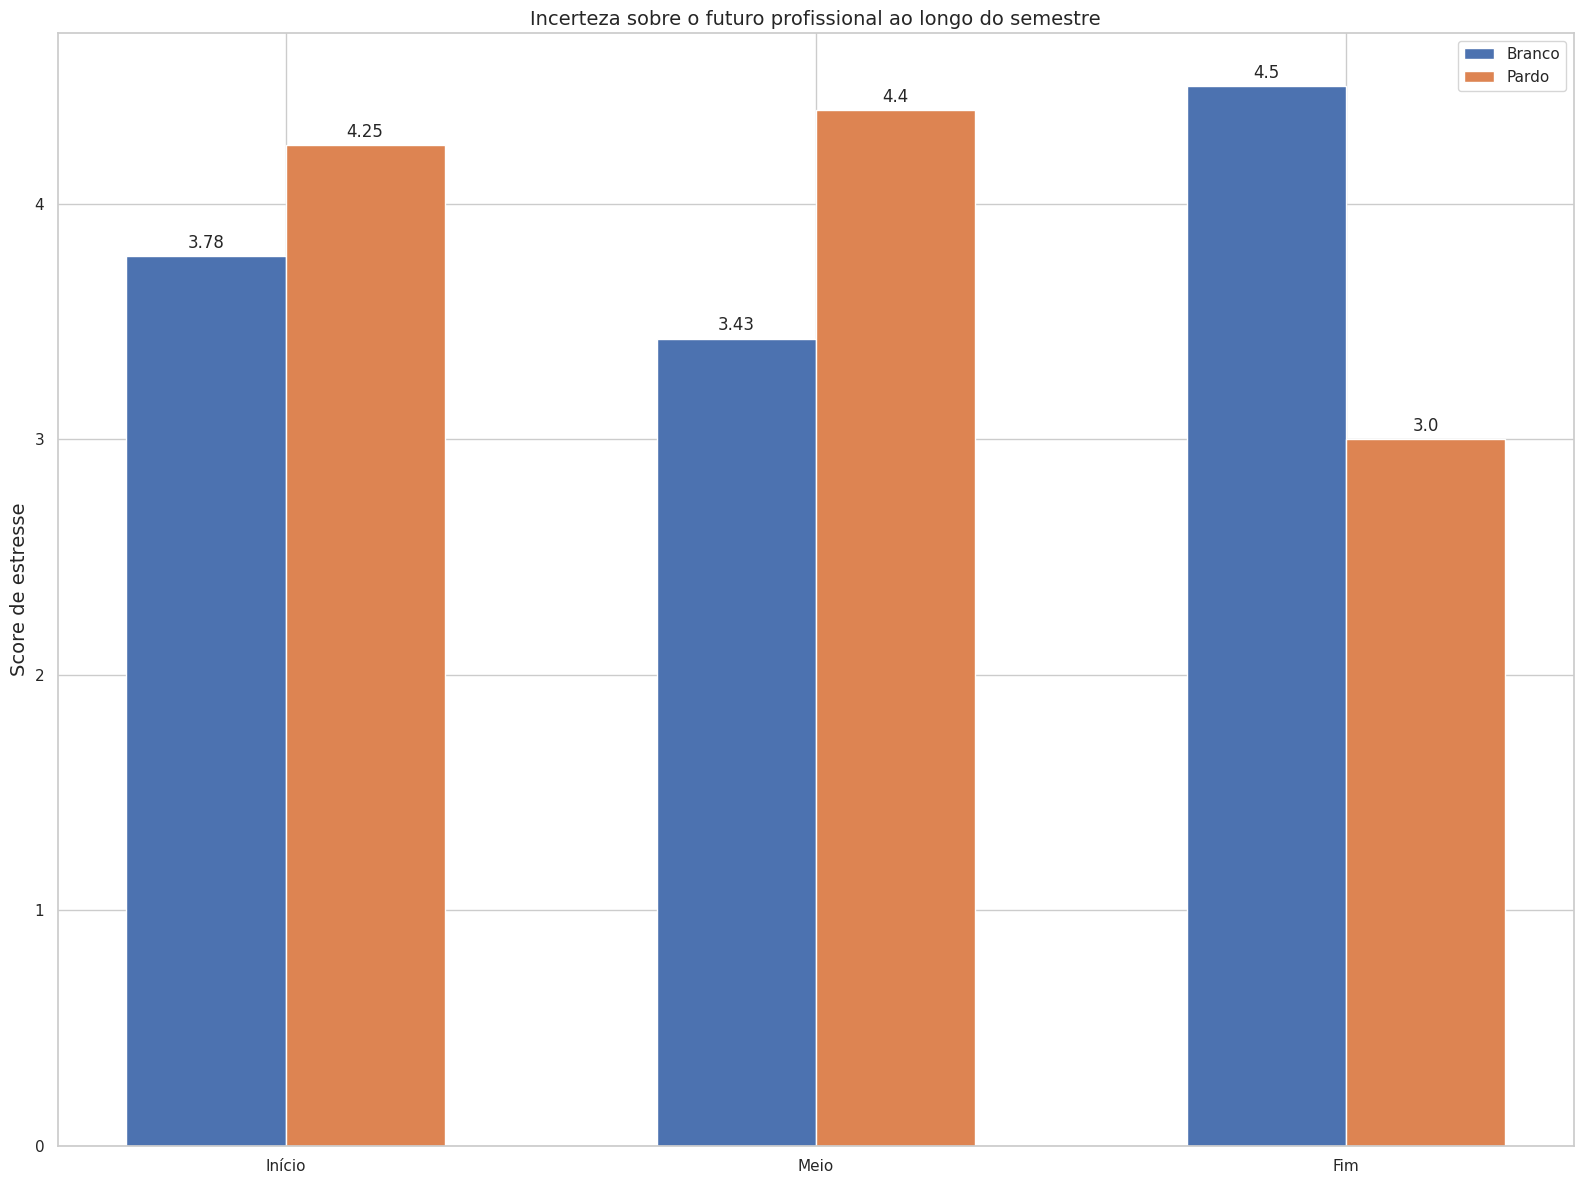

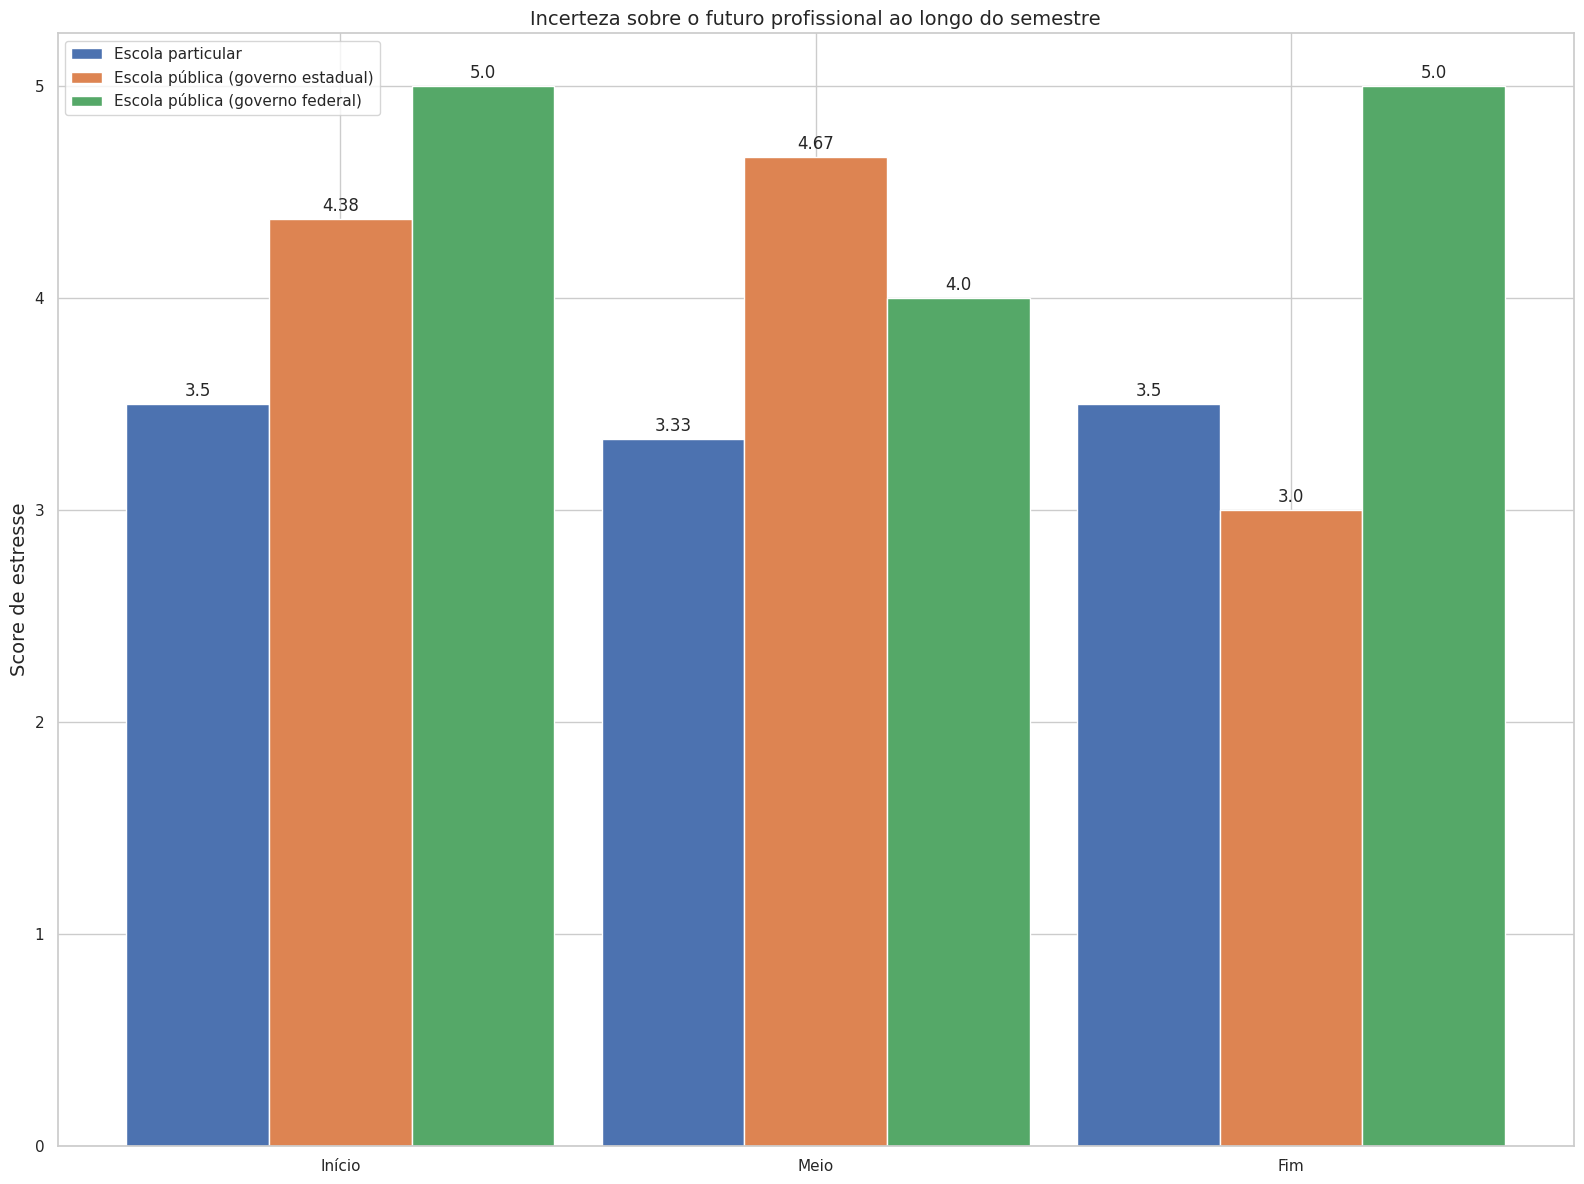

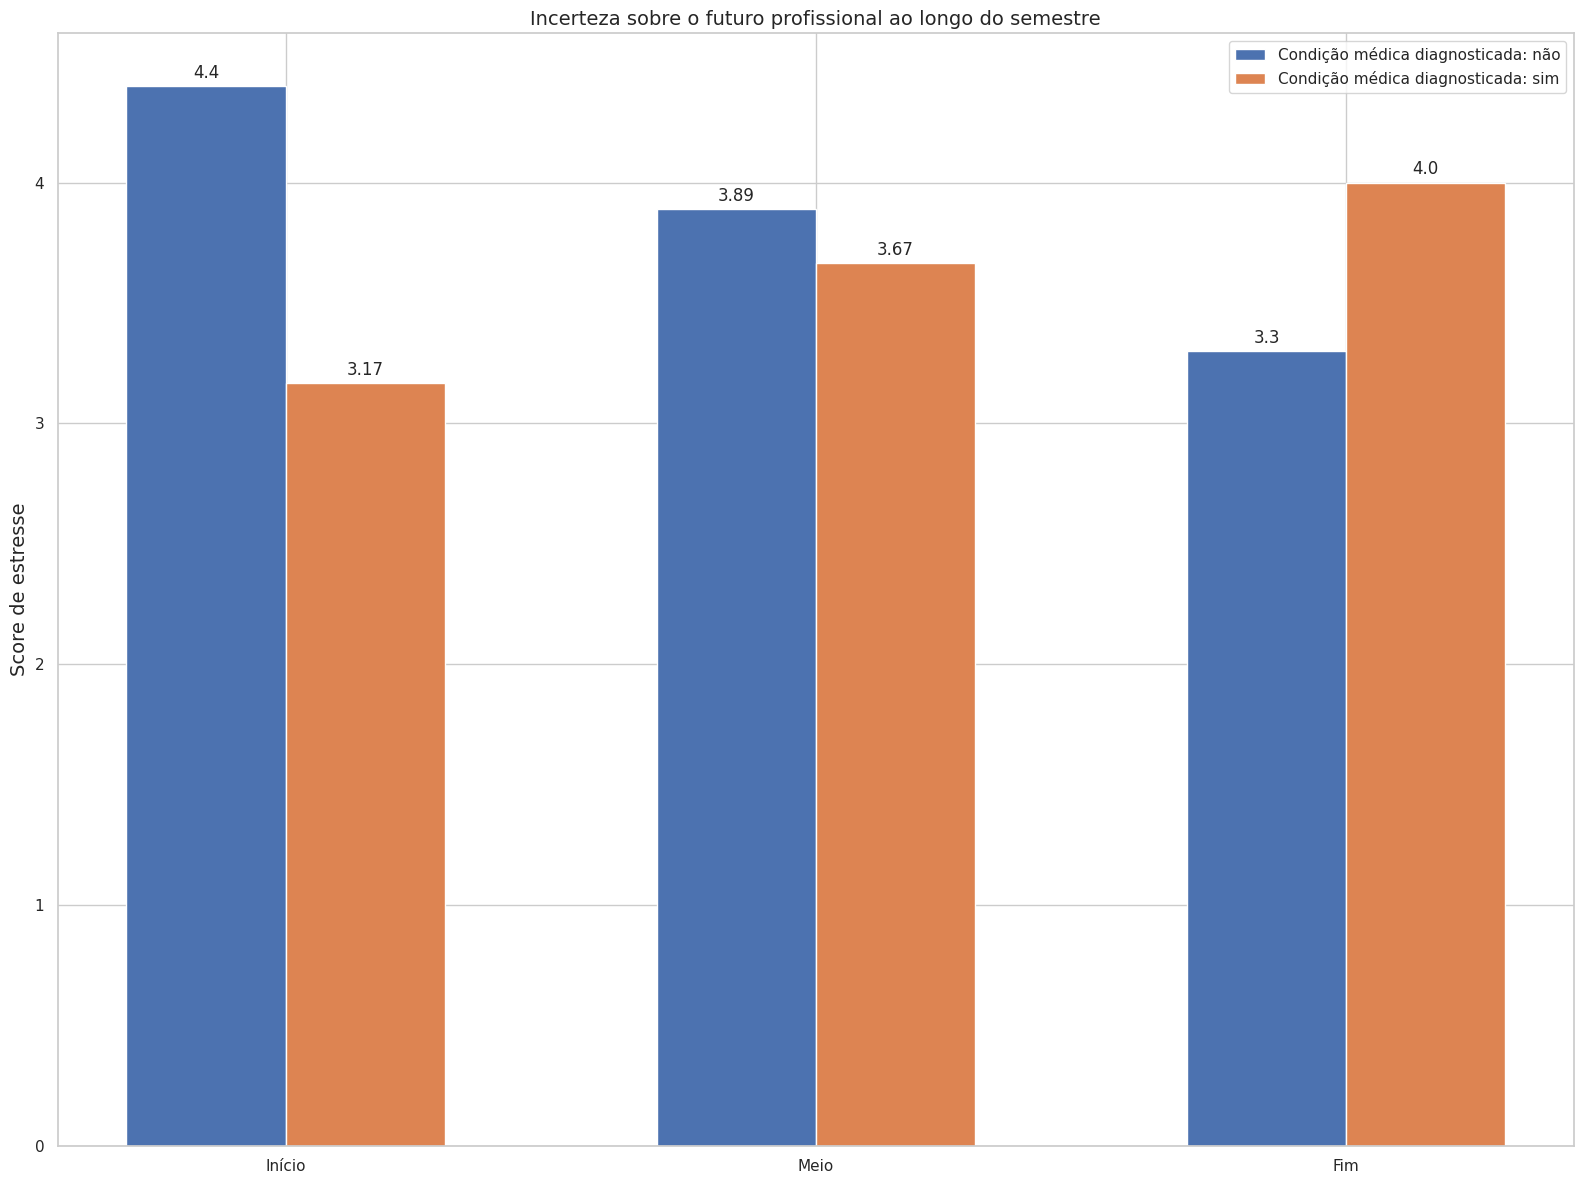

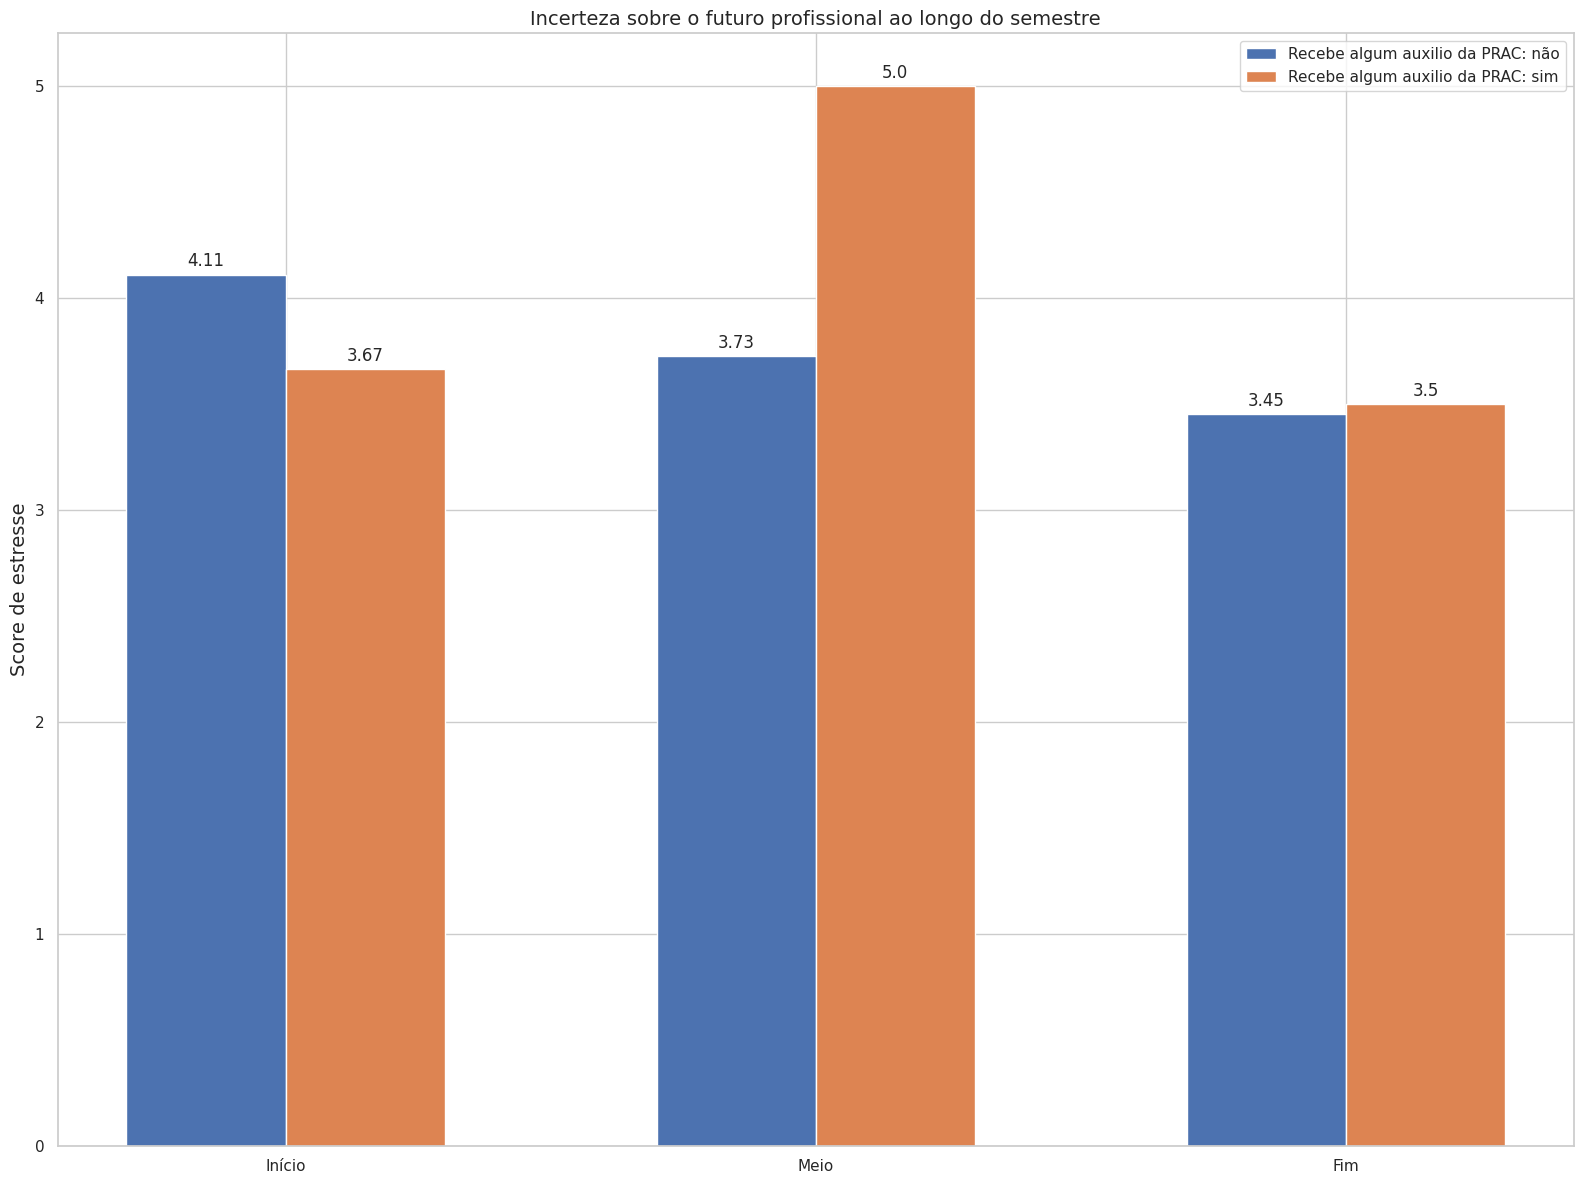

In [90]:
def plot_stress_factor_by_group(dataframes, title, group_by, stress_factor, prefix = None):
    mean_start = dataframes[0].groupby(group_by)[stress_factor].sum() / dataframes[0].groupby(group_by)[stress_factor].size()
    mean_middle = dataframes[1].groupby(group_by)[stress_factor].sum() / dataframes[1].groupby(group_by)[stress_factor].size()
    mean_end = dataframes[2].groupby(group_by)[stress_factor].sum() / dataframes[2].groupby(group_by)[stress_factor].size()

    labels = ['Início', 'Meio', 'Fim']
    groups = mean_start.index
    x = np.arange(len(labels))
    width = 0.3

    fig, ax = plt.subplots(figsize=(16, 12))

    for i, group in enumerate(groups):
        means = [mean_start[group], mean_middle[group], mean_end[group]]
        ax.bar(x + i*width, means, width, label=prefix + ' ' + group.lower() if prefix else group)

    def autolabel(rects):
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(round(height, 2)),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),
                        textcoords="offset points",
                        ha='center', va='bottom')

    for rect_set in ax.containers:
        autolabel(rect_set)

    ax.set_ylabel('Score de estresse', fontsize=14)
    ax.set_title(title, fontsize=14)
    ax.set_xticks(x + width*(len(groups)-1)/2)
    ax.set_xticklabels(labels)
    ax.legend()

    plt.tight_layout()
    plt.show()

title = 'Incerteza sobre o futuro profissional ao longo do semestre'

plot_stress_factor_by_group(dataframes, title, 'genero', 'incerteza_futuro_profissional')
plot_stress_factor_by_group(dataframes, title, 'auto_declaracao', 'incerteza_futuro_profissional')
plot_stress_factor_by_group(dataframes, title, 'ensino_medio', 'incerteza_futuro_profissional')
plot_stress_factor_by_group(dataframes, title, 'deficiencia_condicao_medica', 'incerteza_futuro_profissional', prefix='Condição médica diagnosticada:')
plot_stress_factor_by_group(dataframes, title, 'auxilio_prac', 'incerteza_futuro_profissional', prefix='Recebe algum auxilio da PRAC:')

In [91]:
run_regression(dataframes, 'pressao_familia_emprego', ['genero', 'auto_declaracao','ensino_medio', 'auxilio_prac', 'deficiencia_condicao_medica'])

Análise para o período: Início
                               OLS Regression Results                              
Dep. Variable:     pressao_familia_emprego   R-squared:                       0.654
Model:                                 OLS   Adj. R-squared:                  0.506
Method:                      Least Squares   F-statistic:                     4.419
Date:                     Thu, 26 Oct 2023   Prob (F-statistic):             0.0103
Time:                             03:42:46   Log-Likelihood:                -26.699
No. Observations:                       21   AIC:                             67.40
Df Residuals:                           14   BIC:                             74.71
Df Model:                                6                                         
Covariance Type:                 nonrobust                                         
                                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------

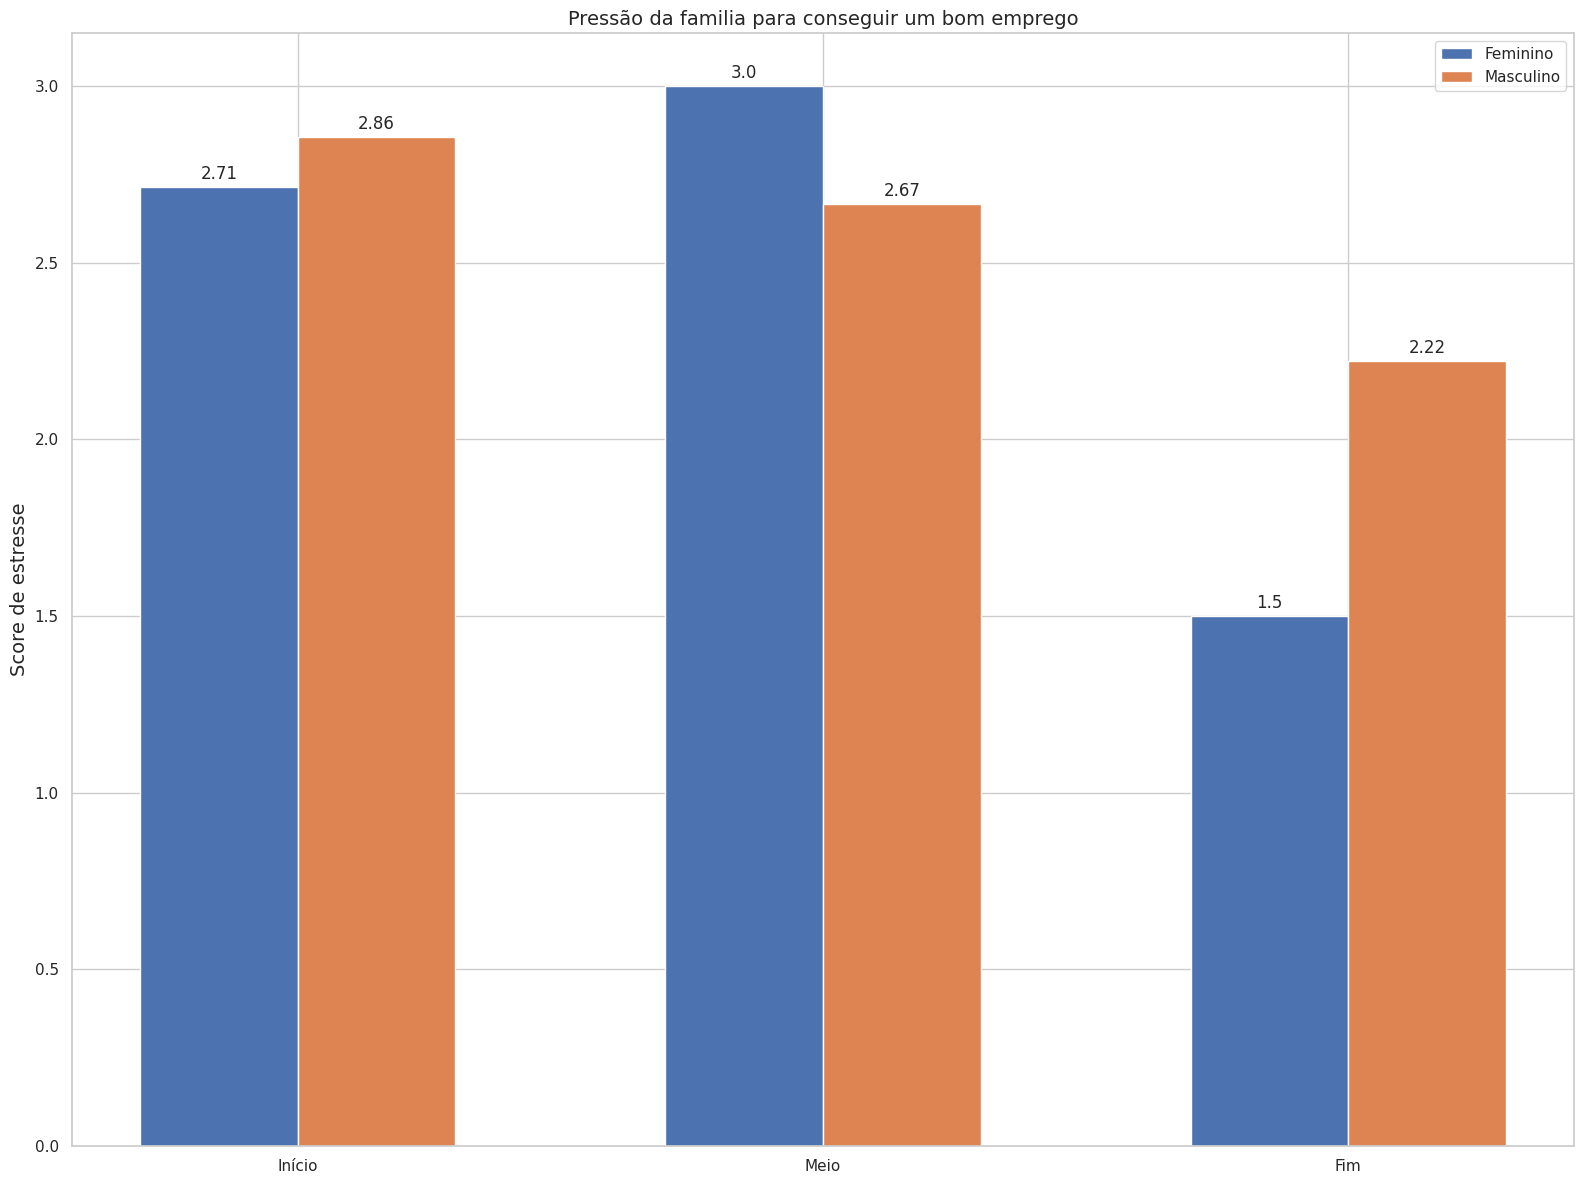

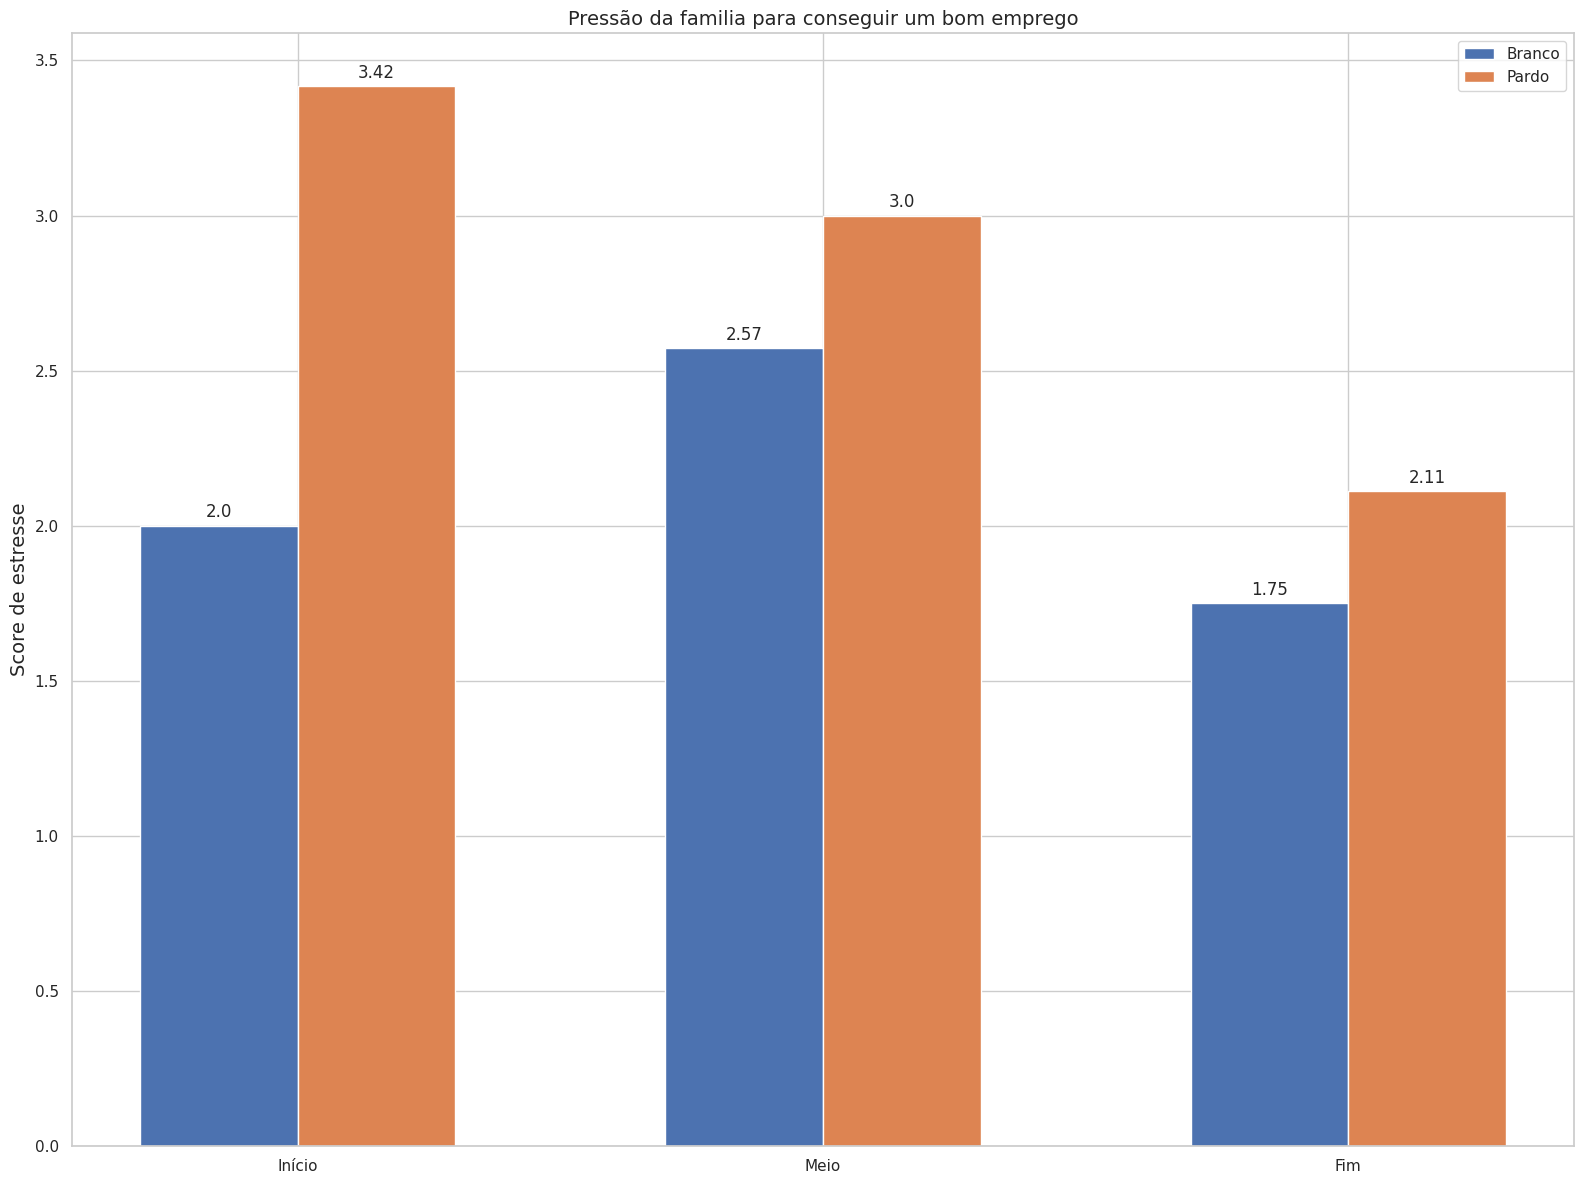

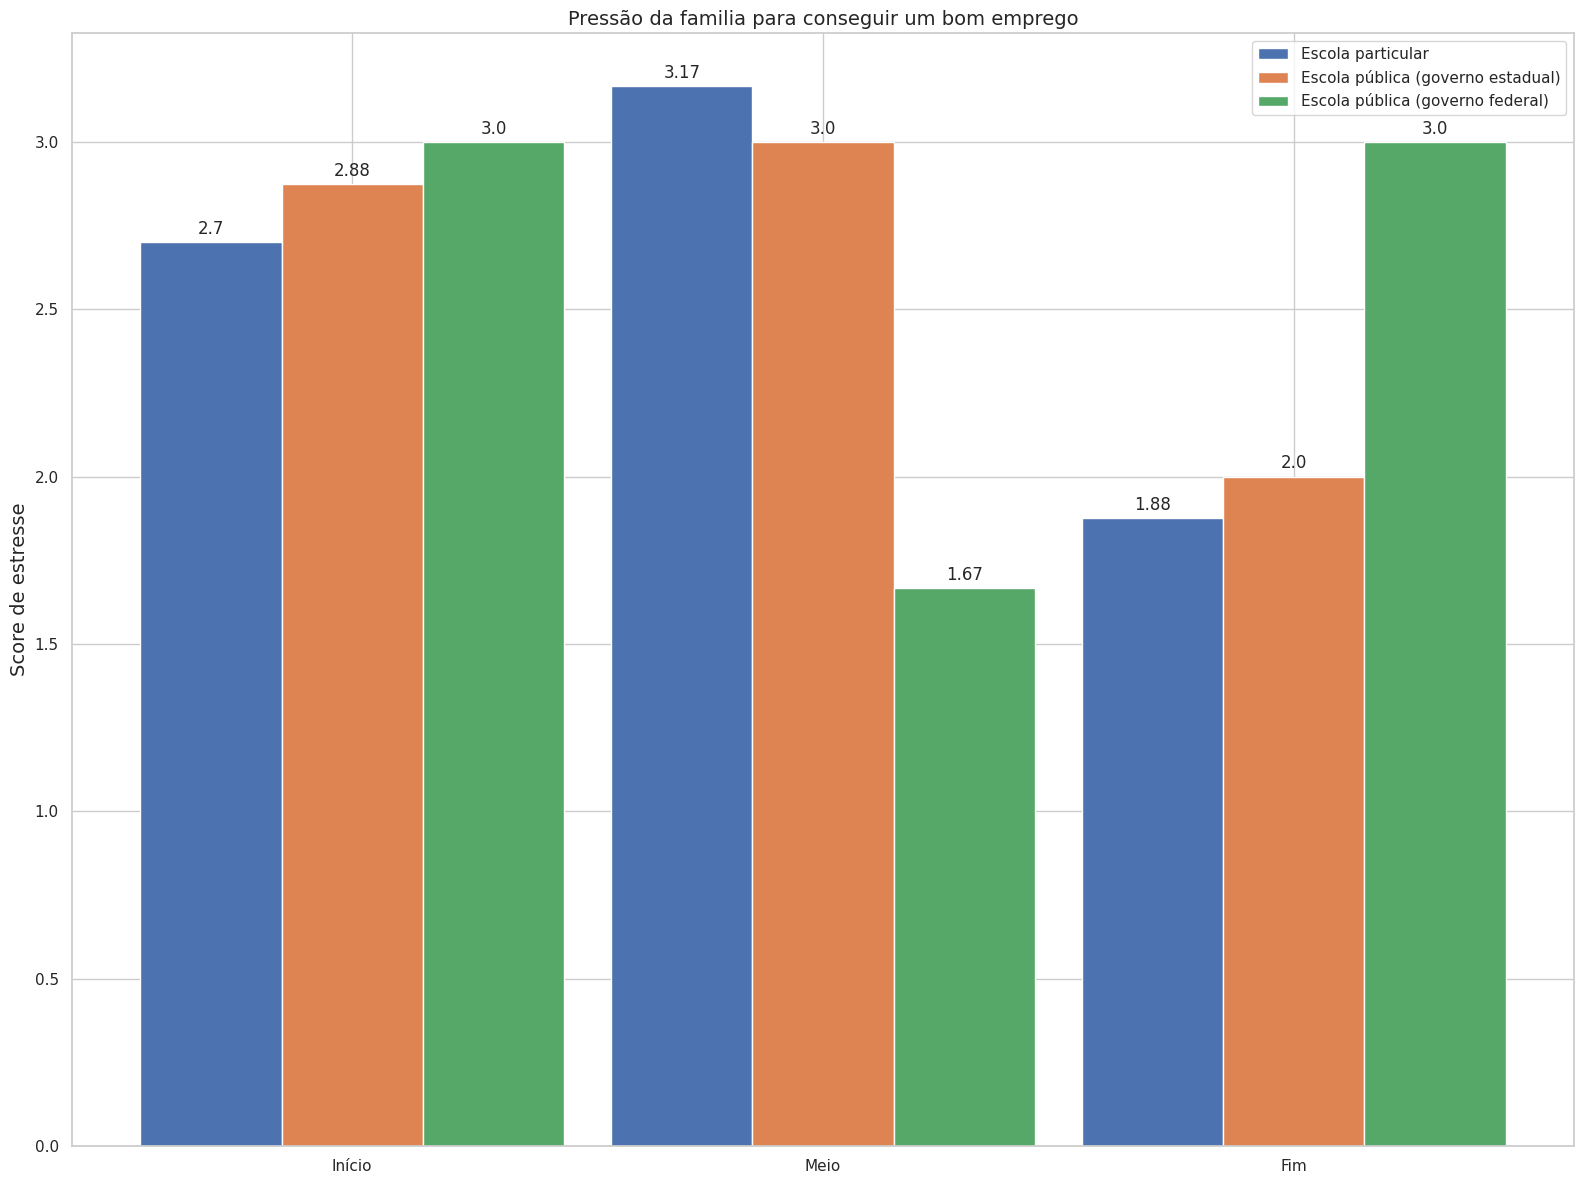

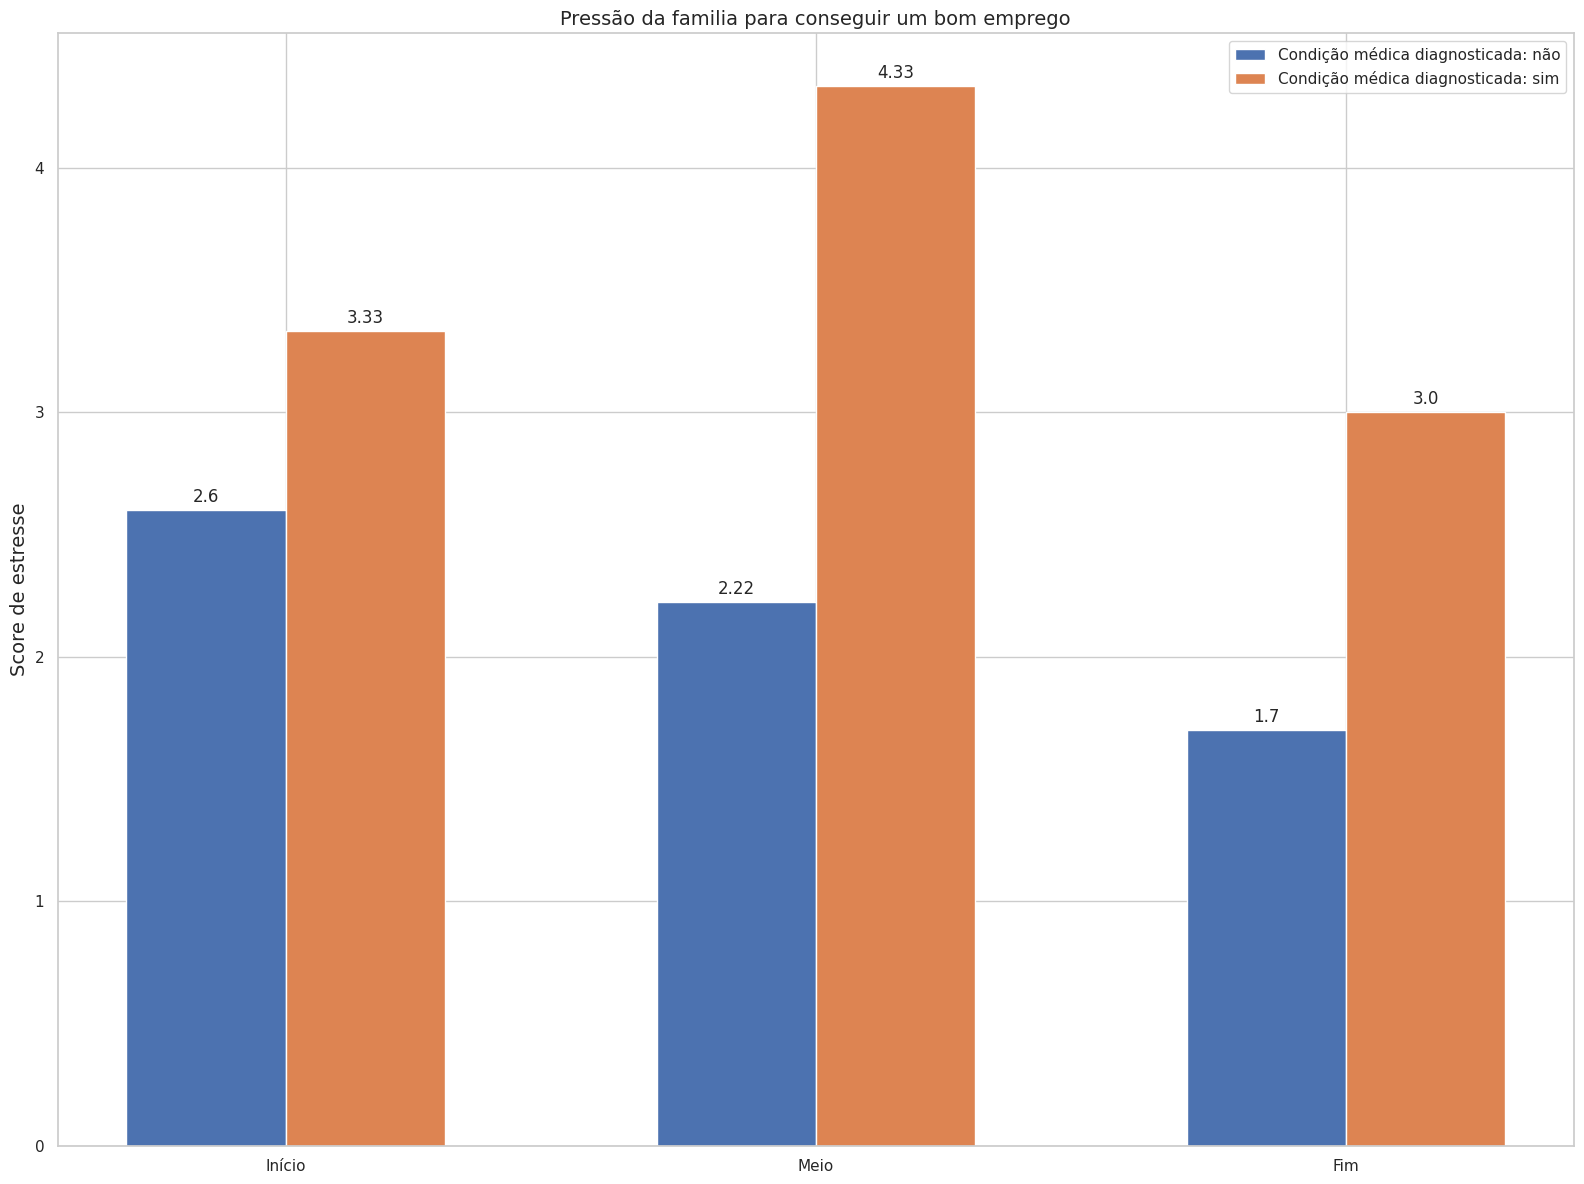

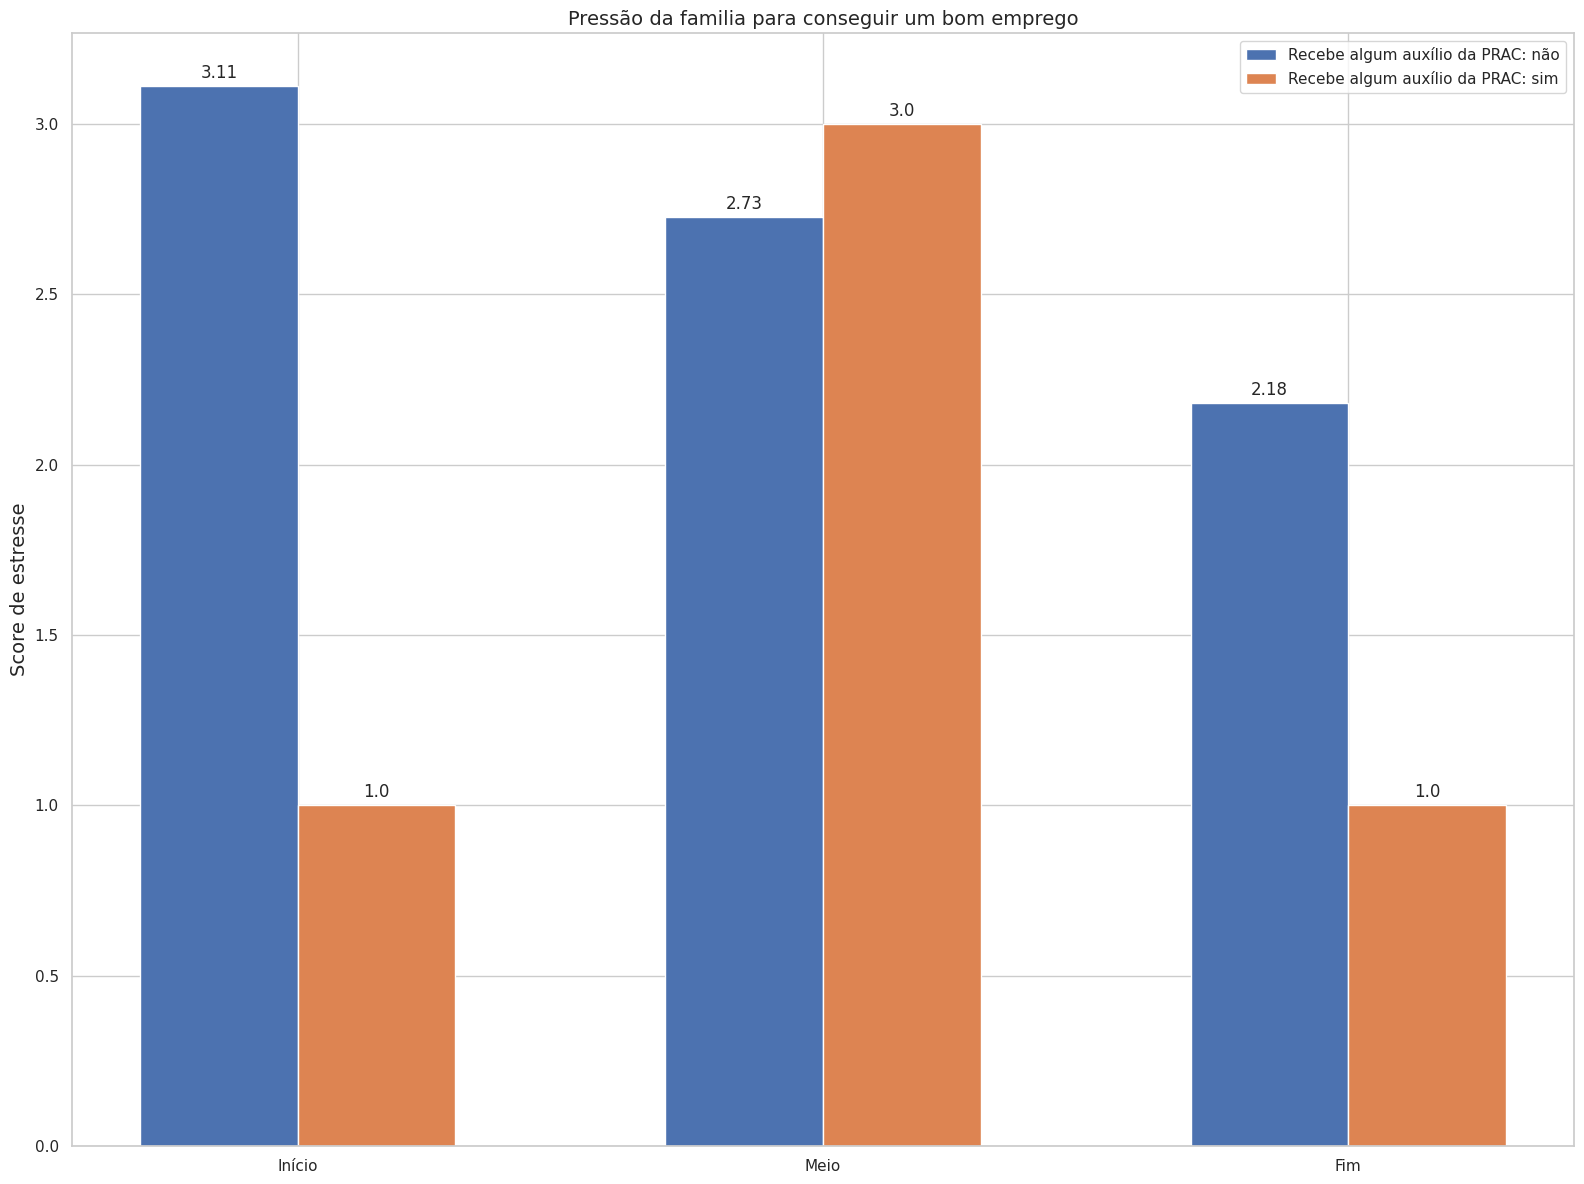

In [92]:
title = 'Pressão da familia para conseguir um bom emprego'
plot_stress_factor_by_group(dataframes, title, 'genero', 'pressao_familia_emprego')
plot_stress_factor_by_group(dataframes, title, 'auto_declaracao', 'pressao_familia_emprego')
plot_stress_factor_by_group(dataframes, title, 'ensino_medio', 'pressao_familia_emprego')
plot_stress_factor_by_group(dataframes, title, 'deficiencia_condicao_medica', 'pressao_familia_emprego', prefix='Condição médica diagnosticada:')
plot_stress_factor_by_group(dataframes, title, 'auxilio_prac', 'pressao_familia_emprego', prefix='Recebe algum auxílio da PRAC:')

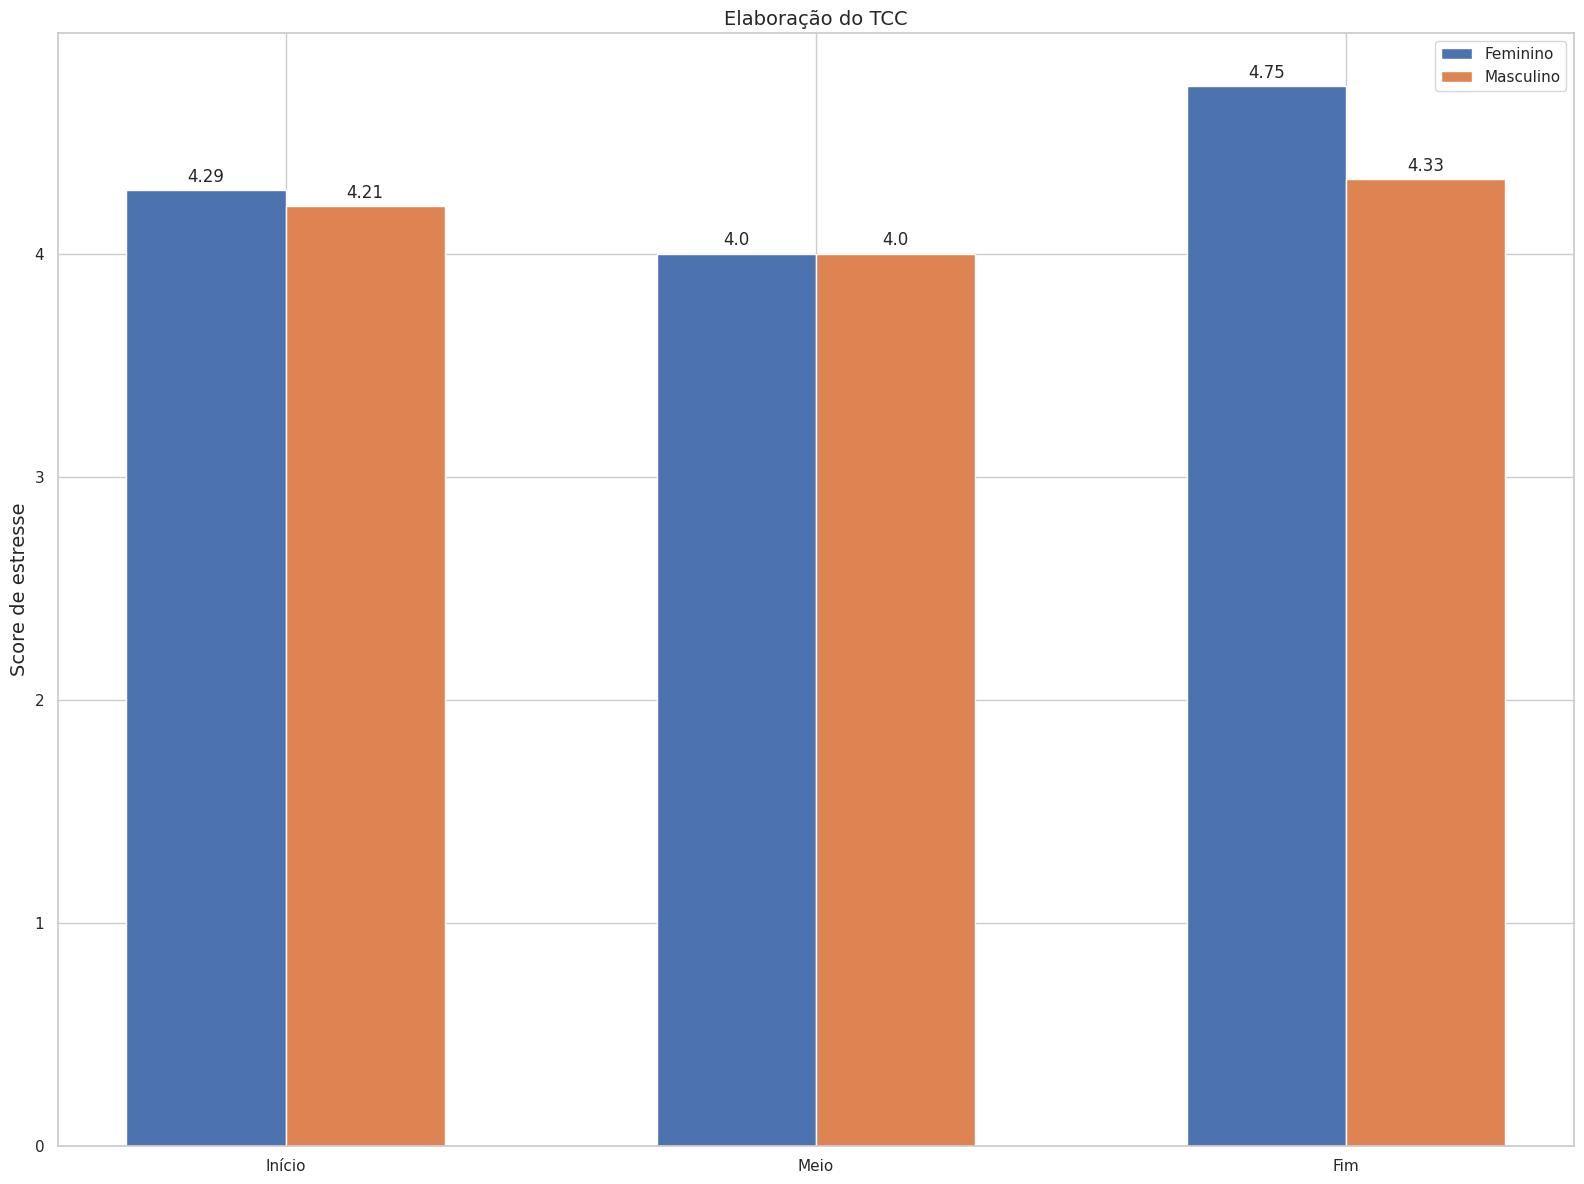

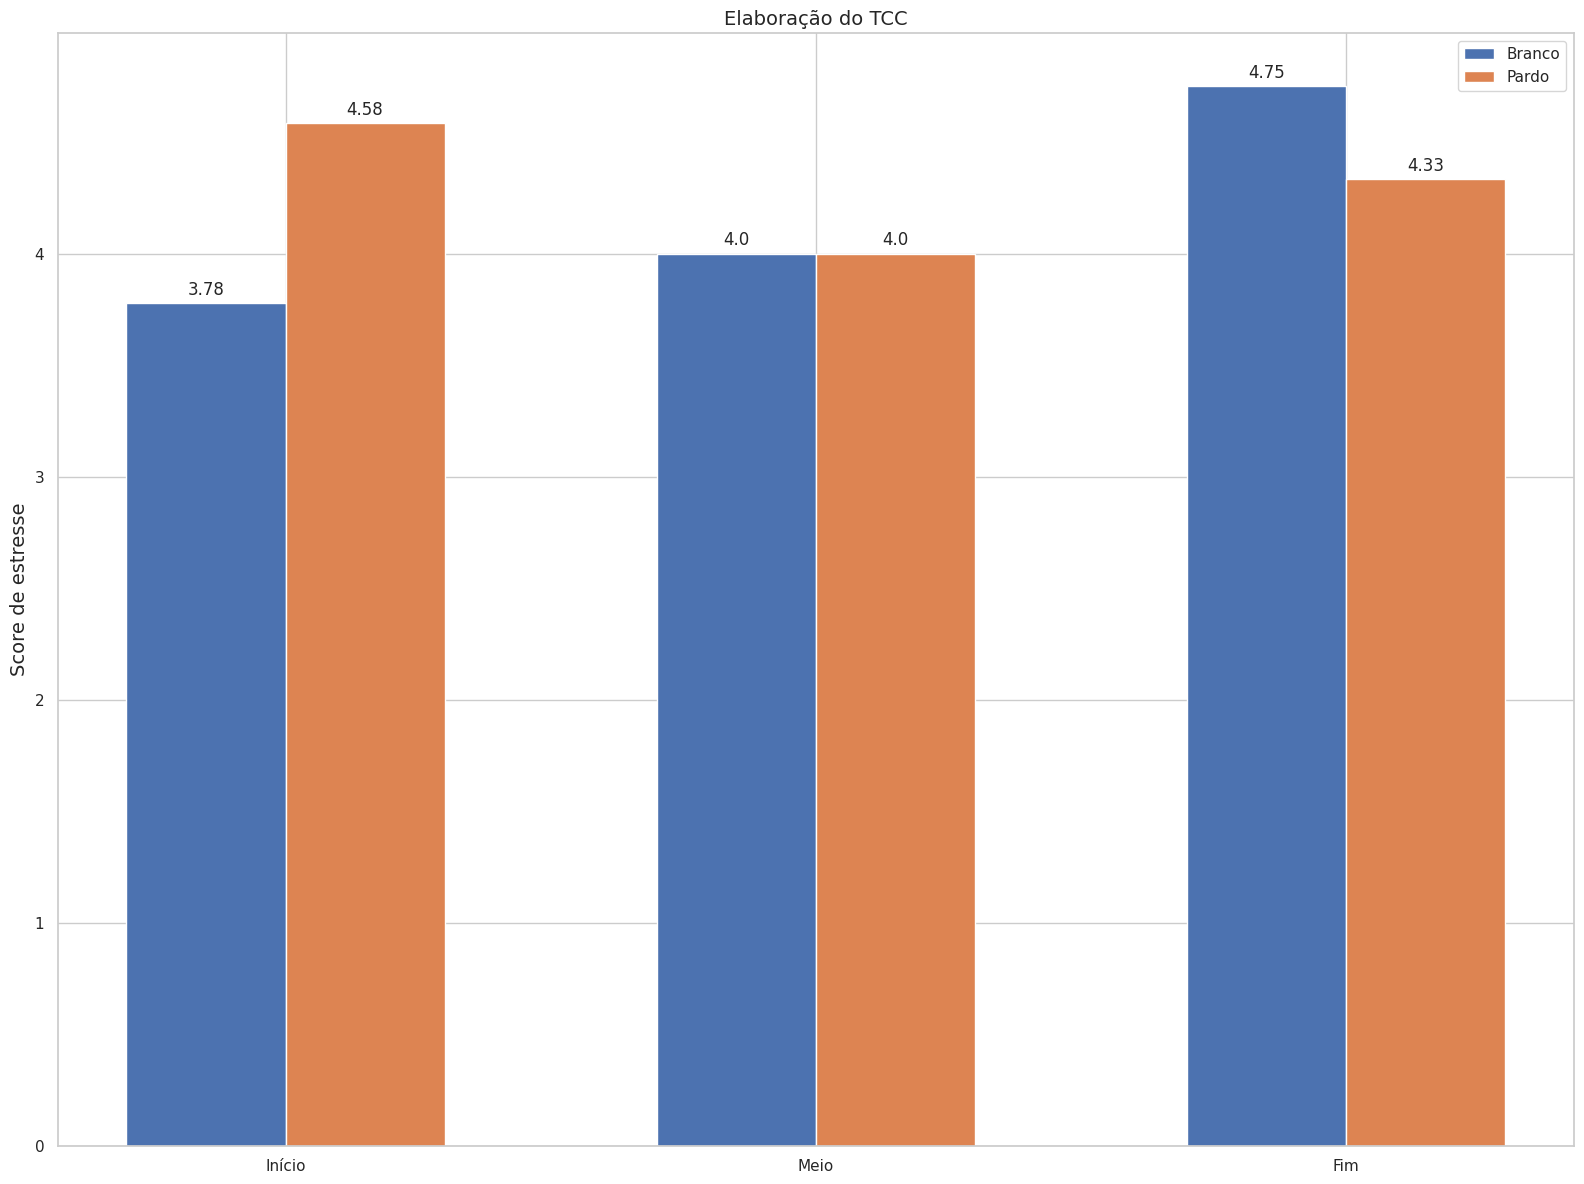

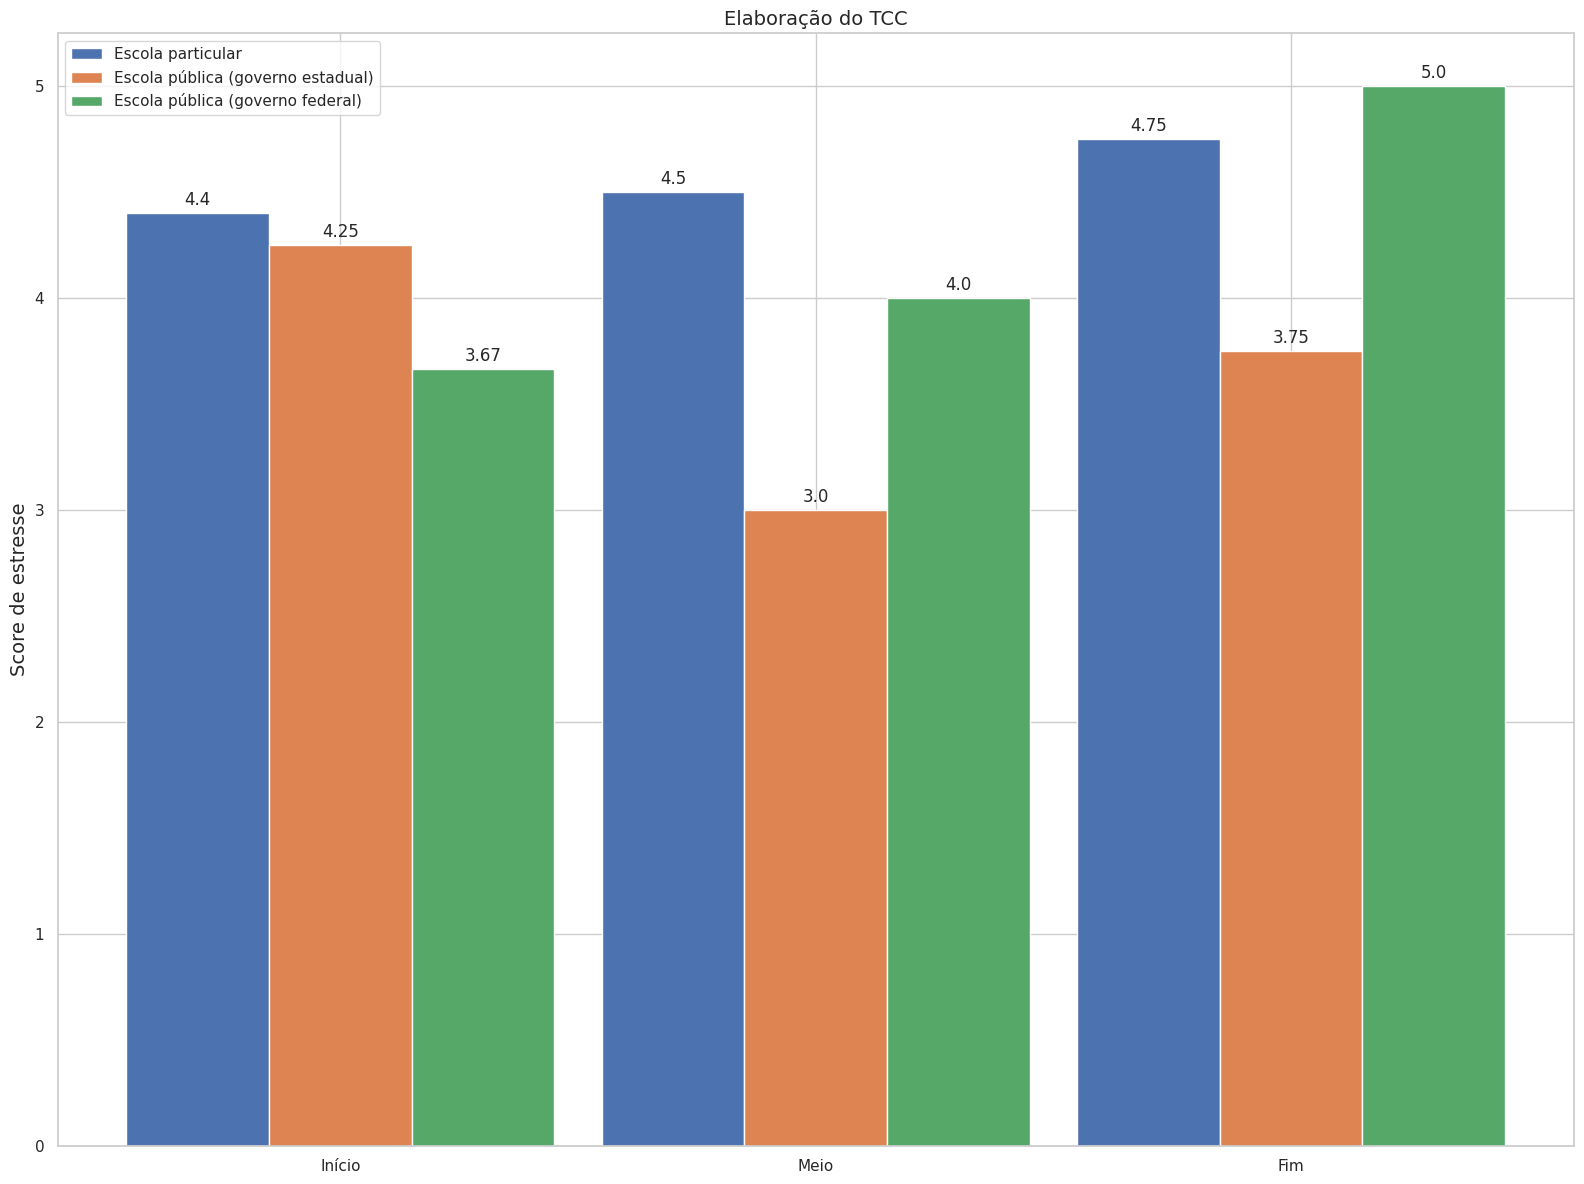

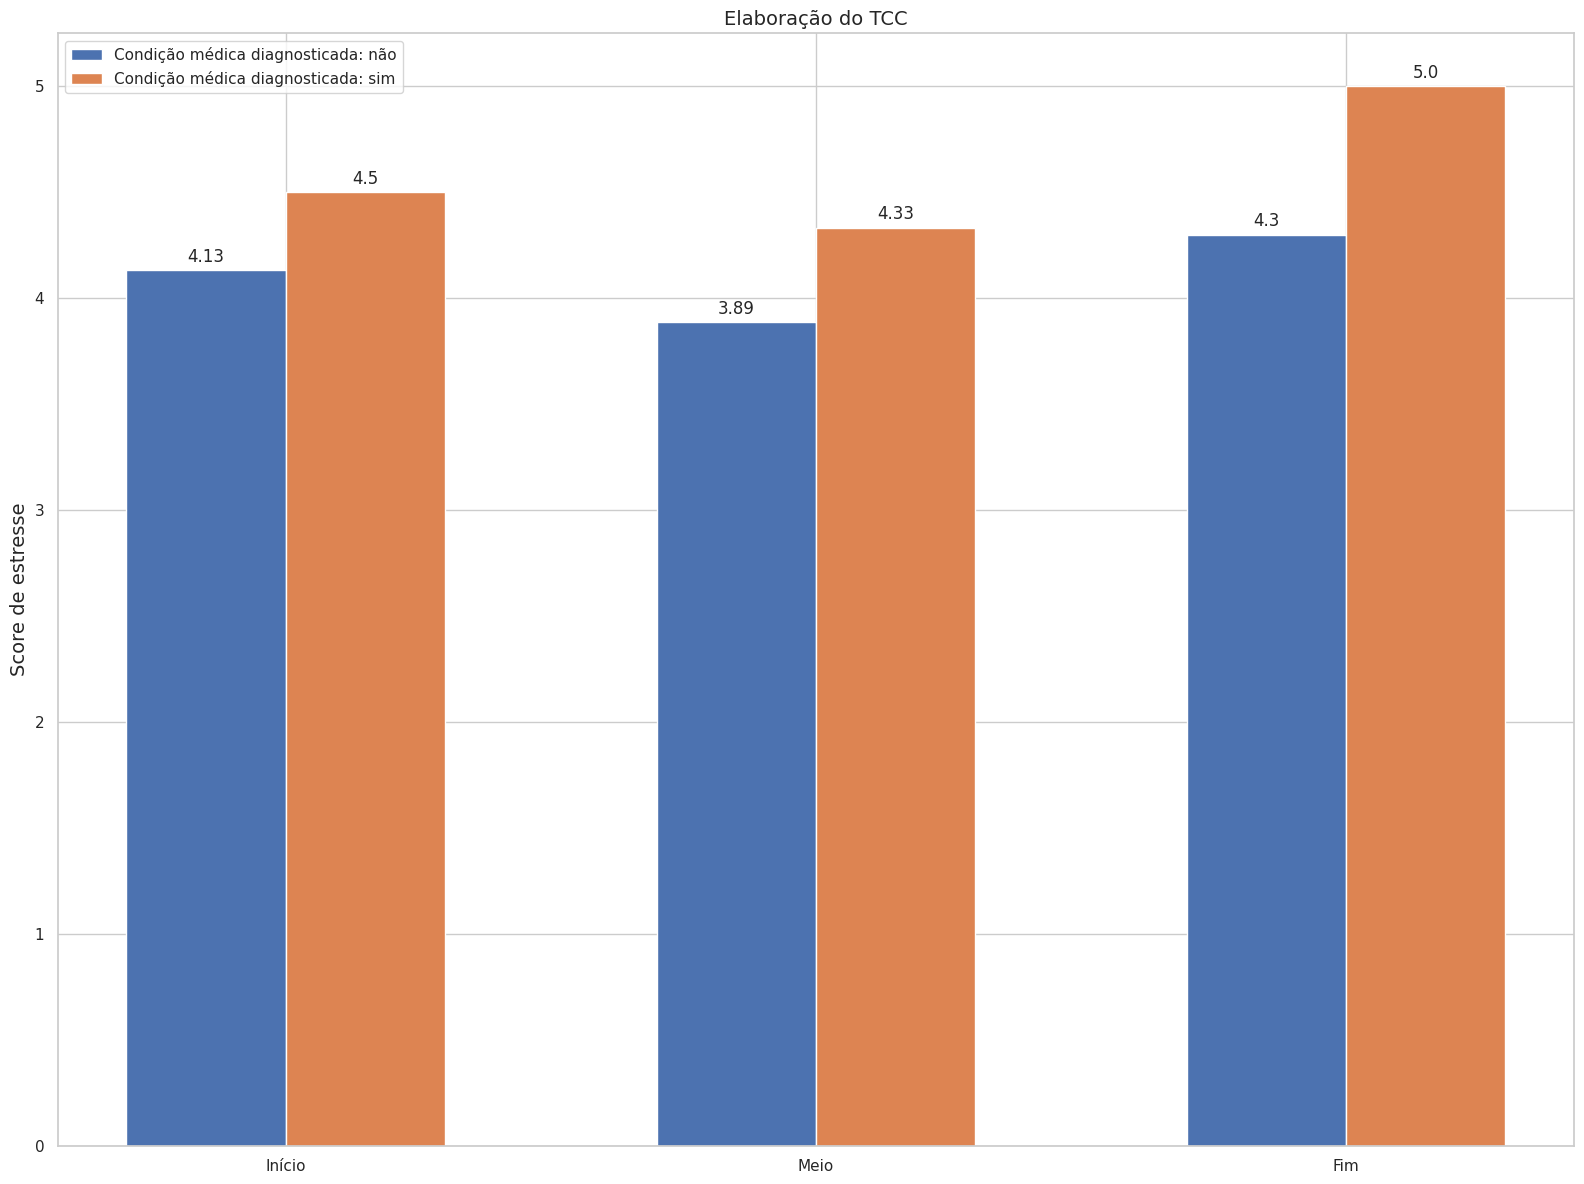

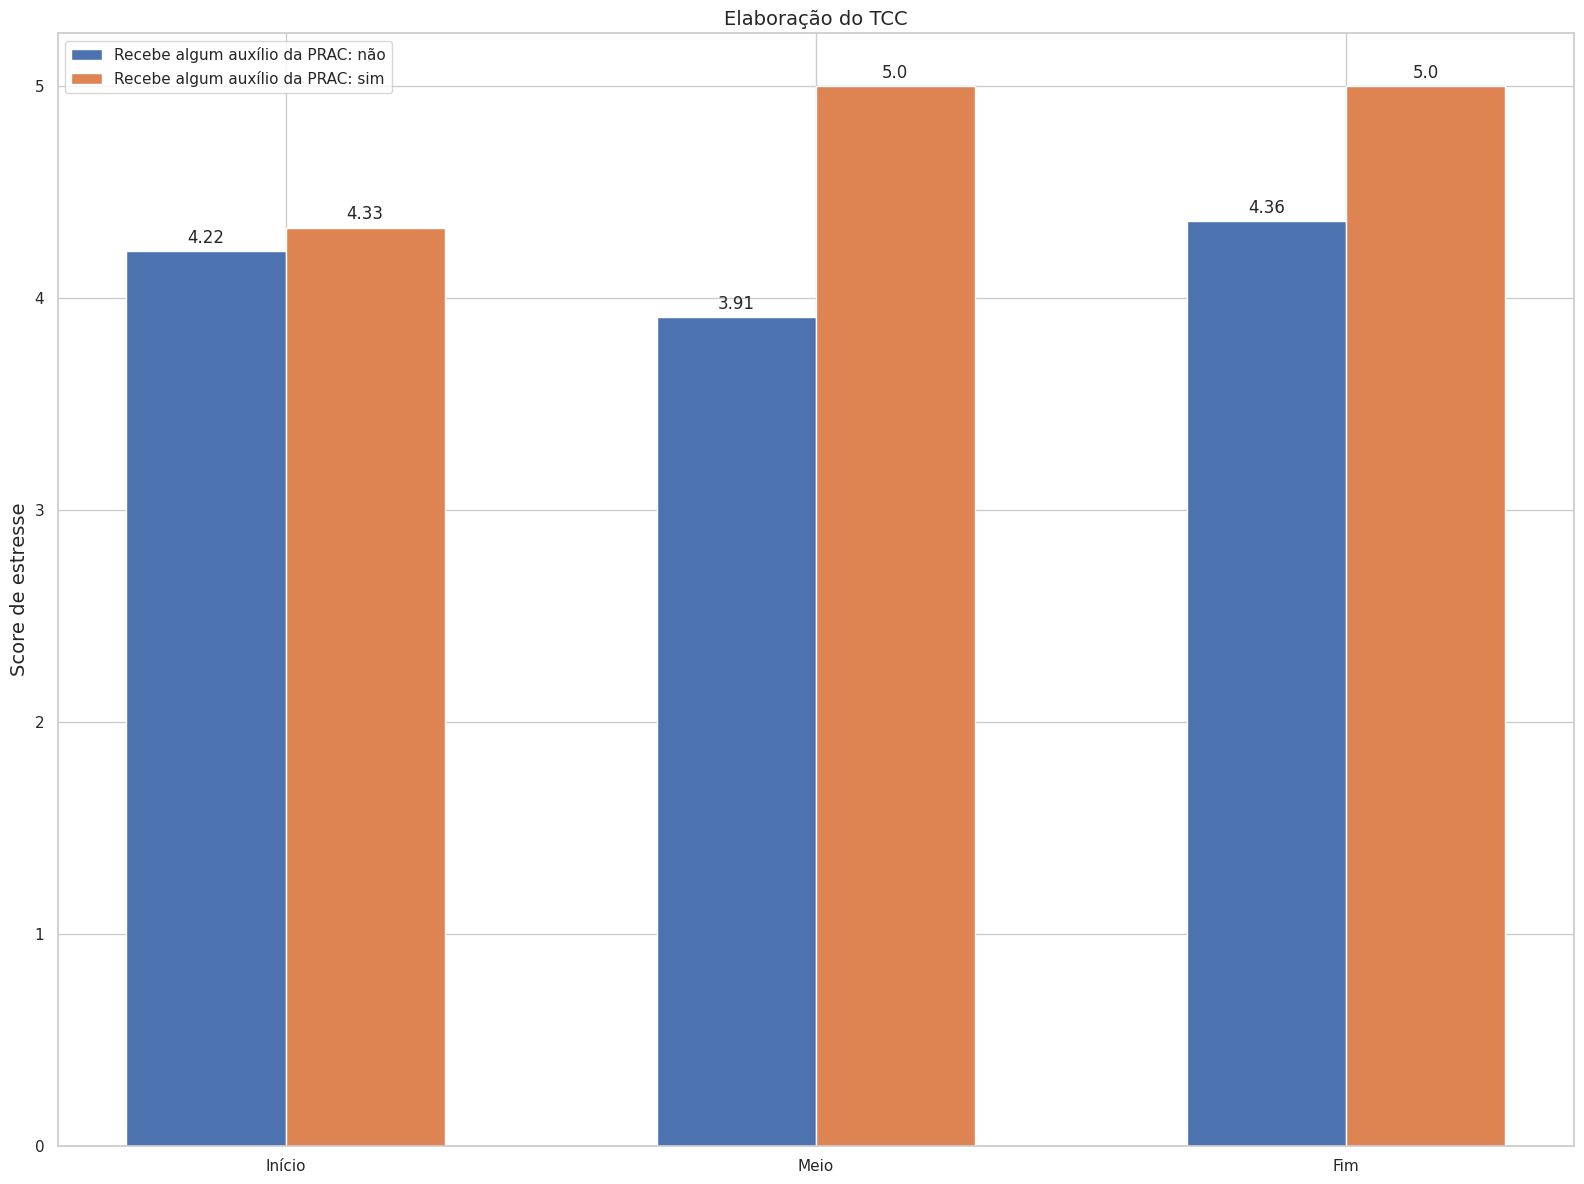

In [93]:
title = 'Elaboração do TCC'
plot_stress_factor_by_group(dataframes, title, 'genero', 'elaboracao_tcc')
plot_stress_factor_by_group(dataframes, title, 'auto_declaracao', 'elaboracao_tcc')
plot_stress_factor_by_group(dataframes, title, 'ensino_medio', 'elaboracao_tcc')
plot_stress_factor_by_group(dataframes, title, 'deficiencia_condicao_medica', 'elaboracao_tcc', prefix='Condição médica diagnosticada:')
plot_stress_factor_by_group(dataframes, title, 'auxilio_prac', 'elaboracao_tcc', prefix='Recebe algum auxílio da PRAC:')

In [94]:
run_regression(dataframes, 'elaboracao_tcc', ['dormir_insuficiente','financas','incerteza_futuro_profissional', 'pressao_familia_emprego', 'falta_exercicio', 'nutricao', 'genero', 'auto_declaracao', 'carga_horaria_curso'])

Análise para o período: Início
                            OLS Regression Results                            
Dep. Variable:         elaboracao_tcc   R-squared:                       0.547
Model:                            OLS   Adj. R-squared:                  0.176
Method:                 Least Squares   F-statistic:                     1.473
Date:                Thu, 26 Oct 2023   Prob (F-statistic):              0.268
Time:                        03:42:50   Log-Likelihood:                -20.881
No. Observations:                  21   AIC:                             61.76
Df Residuals:                      11   BIC:                             72.21
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------